<a href="https://colab.research.google.com/github/IheebM/HQ/blob/master/CodeWars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import subprocess,shlex,sys,glob,functools,math,re,os,random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate 
import matplotlib.pylab as pylab
import sklearn.preprocessing as skp
import IPython

In [ ]:
%load_ext google.colab.data_table
%load_ext tensorboard

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
#@title Python test framework master { display-mode: "form" }

from __future__ import print_function
def expect(passed=None, message=None, allow_raise=False):
    if passed:
        display('PASSED', 'Test Passed')
    else:
        message = message or "Value is not what was expected"
        display('FAILED', message)
        if allow_raise:
            raise AssertException(message)

class test():
  class AssertException(Exception):
      pass


  def format_message(message):
      return message.replace("\n", "<:LF:>")


  def display(type, message, label="", mode=""):
      print("\n<{0}:{1}:{2}>{3}".format(
          type.upper(), mode.upper(), label, format_message(message)))


  def assert_equals(actual, expected, message=None, allow_raise=False):
      equals_msg = "{0} should equal {1}".format(repr(actual), repr(expected))
      if message is None:
          message = equals_msg
      else:
          message += ": " + equals_msg
      expect(actual == expected, message, allow_raise)


  def assert_not_equals(actual, expected, message=None, allow_raise=False):
      r_actual, r_expected = repr(actual), repr(expected)
      equals_msg = "{0} should not equal {1}".format(r_actual, r_expected)
      if message is None:
          message = equals_msg
      else:
          message += ": " + equals_msg

      expect(not (actual == expected), message, allow_raise)


  def expect_error(message, function, exception=Exception):
      passed = False
      try:
          function()
      except exception:
          passed = True
      except Exception as e:
          message = "{}: {} should be {}".format(message or "Unexpected exception", repr(e), repr(exception))
      expect(passed, message)


  def expect_no_error(message, function, exception=BaseException):
      try:
          function()
      except exception as e:
          fail("{}: {}".format(message or "Unexpected exception", repr(e)))
          return
      except:
          pass
      pass_()


  def pass_(): expect(True)


  def fail(message): expect(False, message)


  def assert_approx_equals(
          actual, expected, margin=1e-9, message=None, allow_raise=False):
      msg = "{0} should be close to {1} with absolute or relative margin of {2}"
      equals_msg = msg.format(repr(actual), repr(expected), repr(margin))
      if message is None:
          message = equals_msg
      else:
          message += ": " + equals_msg
      div = max(abs(actual), abs(expected), 1)
      expect(abs((actual - expected) / div) < margin, message, allow_raise)


  '''
  Usage:
  @describe('describe text')
  def describe1():
      @it('it text')
      def it1():
          # some test cases...
  '''


  def _timed_block_factory(opening_text):
      from timeit import default_timer as timer
      from traceback import format_exception
      from sys import exc_info

      def _timed_block_decorator(s, before=None, after=None):
          display(opening_text, s)

          def wrapper(func):
              if callable(before):
                  before()
              time = timer()
              try:
                  func()
              except AssertionError as e:
                  display('FAILED', str(e))
              except Exception:
                  fail('Unexpected exception raised')
                  tb_str = ''.join(format_exception(*exc_info()))
                  display('ERROR', tb_str)
              display('COMPLETEDIN', '{:.2f}'.format((timer() - time) * 1000))
              if callable(after):
                  after()
          return wrapper
      return _timed_block_decorator


  describe = _timed_block_factory('DESCRIBE')
  it = _timed_block_factory('IT')


  '''
  Timeout utility
  Usage:
  @timeout(sec)
  def some_t

      any code block...
  Note: Timeout value can be a float.
  '''


  def timeout(sec):
      def wrapper(func):
          from multiprocessing import Process
          msg = 'Should not throw any exceptions inside timeout'

          def wrapped():
              expect_no_error(msg, func)
          process = Process(target=wrapped)
          process.start()
          process.join(sec)
          if process.is_alive():
              fail('Exceeded time limit of {:.3f} seconds'.format(sec))
              process.terminate()
              process.join()
      return wrapper


In [ ]:
import time
def running_time(fun,*argv):
  start_time = time.time()
  print(fun(*argv),"--- %s seconds ---" % (time.time() - start_time))

In [ ]:
#@title STOP COLAB FROM DISCONNECTING

import IPython
js_code = '''
setInterval(document.querySelector("colab-connect-button").click()
,60000)'''
display(IPython.display.Javascript(js_code))
# function KeepClicking(){
# console.log("Clicking");
# document.querySelector("colab-connect-button").click()
# }
# setInterval(document.querySelector("colab-connect-button").click()
# ,60000)

<IPython.core.display.Javascript object>

# **QM simulations**

Bound states solutions for a finite square well potential

V(x)=-V0 if |x|<a, else 0 

V0,a>0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


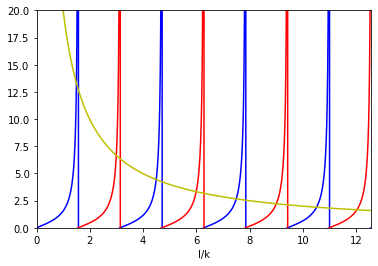

In [ ]:
#@title Bound states solutions for a finite square well potential

# v0=int(input("V0="))
# a=int(input("a="))
v0 = 130  #@param {type: "slider", min: 0, max: 1000}
#E = 164  #@param {type: "slider", min: 100, max: 100}
a = 19  #@param {type: "slider", min: 0, max: 200}
E=-v0/2

scale=34
h_=6.62*10**(-34+scale)
m=1.67*10**(-27+scale)
k=np.sqrt(2*m*E)/h_
l=np.sqrt(2*m*(E+v0))/h_
z=l*a
z0=np.sqrt(2*m*v0*a**2/h_**2)
f=lambda x:np.sqrt(z0**2/x**2-1)*10E-6


x=np.arange(0,4*math.pi,math.pi/4000)
plt.xlabel("l/k")
plt.xlim(0,4*np.pi)
plt.ylim(0,20)

plt.plot(x,np.tan(x),"b")
plt.plot(x,-1/np.tan(x),"r")
plt.plot(x,f(x),"y")

In [ ]:
#@title Binding Variable: Mass number, atomic number, isotope name, mass [MeV/c^2], binding energy [MeV] and binding energy per nucleus [MeV]
#@markdown Required for the code below
binding="""001 000 n X -1 -1.0
001 001 1H 938.272 0 0
001 002 X X -1 -1.0
002 000 X X -1 -1.0
002 001 2H 1875.613 2.225 1.112
002 002 X X -1 -1.0
003 000 X X -1 -1.0
003 001 3H 2808.921 8.482 2.827
003 002 3He 2808.391 7.718 2.573
003 003 X X -1 -1.0
004 001 4H 3751.365 5.603 1.401
004 002 4He 3727.379 28.296 7.074
004 003 4Li 3749.763 4.618 1.155
005 001 5H 4689.849 6.684 1.337
005 002 5He 4667.838 27.402 5.48
005 003 5Li 4667.617 26.33 5.266
006 001 6H 5630.313 5.786 0.964
006 002 6He 5605.537 29.268 4.878
006 003 6Li 5601.518 31.994 5.332
006 004 6Be 5605.295 26.924 4.487
007 002 7He 6545.537 28.834 4.119
007 003 7Li 6533.833 39.244 5.606
007 004 7Be 6534.184 37.6 5.371
007 005 7B 6545.773 24.718 3.531
008 002 8He 7482.528 31.408 3.926
008 003 8Li 7471.366 41.277 5.16
008 004 8Be 7454.85 56.5 7.062
008 005 8B 7472.319 37.737 4.717
008 006 8C 7483.98 24.783 3.098
009 002 9He 8423.363 30.138 3.349
009 003 9Li 8406.867 45.341 5.038
009 004 9Be 8392.75 58.165 6.463
009 005 9B 8393.307 56.314 6.257
009 006 9C 8409.291 39.037 4.337
010 002 10He 9362.728 30.339 3.034
010 003 10Li 9346.458 45.315 4.532
010 004 10Be 9325.503 64.977 6.498
010 005 10B 9324.436 64.751 6.475
010 006 10C 9327.573 60.32 6.032
010 007 10N 9350.163 36.437 3.644
011 003 11Li 10285.698 45.64 4.149
011 004 11Be 10264.564 65.481 5.953
011 005 11B 10252.547 76.205 6.928
011 006 11C 10254.018 73.44 6.676
011 007 11N 10267.157 59.008 5.364
012 004 12Be 11200.961 68.649 5.721
012 005 12B 11188.742 79.575 6.631
012 006 12C 11174.862 92.162 7.68
012 007 12N 11191.689 74.041 6.17
012 008 12O 11205.888 58.549 4.879
013 004 13Be 12140.628 68.548 5.273
013 005 13B 12123.429 84.453 6.496
013 006 13C 12109.481 97.108 7.47
013 007 13N 12111.191 94.105 7.239
013 008 13O 12128.446 75.556 5.812
014 004 14Be 13078.822 69.919 4.994
014 005 14B 13062.025 85.423 6.102
014 006 14C 13040.87 105.285 7.52
014 007 14N 13040.203 104.659 7.476
014 008 14O 13044.836 98.732 7.052
015 005 15B 13998.827 88.186 5.879
015 006 15C 13979.217 106.503 7.1
015 007 15N 13968.935 115.492 7.699
015 008 15O 13971.178 111.955 7.464
015 009 15F 13984.591 97.249 6.483
016 005 16B 14938.429 88.149 5.509
016 006 16C 14914.532 110.753 6.922
016 007 16N 14906.011 117.981 7.374
016 008 16O 14895.079 127.619 7.976
016 009 16F 14909.985 111.42 6.964
016 010 16Ne 14922.79 97.322 6.083
017 005 17B 15876.613 89.531 5.267
017 006 17C 15853.371 111.479 6.558
017 007 17N 15839.692 123.865 7.286
017 008 17O 15830.501 131.763 7.751
017 009 17F 15832.751 128.22 7.542
017 010 17Ne 15846.749 112.928 6.643
018 006 18C 16788.756 115.66 6.426
018 007 18N 16776.429 126.693 7.039
018 008 18O 16762.023 139.807 7.767
018 009 18F 16763.167 137.369 7.632
018 010 18Ne 16767.099 132.143 7.341
018 011 18Na 16785.461 112.488 6.249
019 006 19C 17727.74 116.241 6.118
019 007 19N 17710.671 132.017 6.948
019 008 19O 17697.633 143.761 7.566
019 009 19F 17692.3 147.801 7.779
019 010 19Ne 17695.028 143.78 7.567
019 011 19Na 17705.692 131.822 6.938
019 012 19Mg 17725.294 110.927 5.838
020 006 20C 18664.374 119.172 5.959
020 007 20N 18648.073 134.18 6.709
020 008 20O 18629.59 151.37 7.569
020 009 20F 18625.264 154.403 7.72
020 010 20Ne 18617.728 160.645 8.032
020 011 20Na 18631.107 145.973 7.299
020 012 20Mg 18641.318 134.468 6.723
021 007 21N 19583.047 138.771 6.608
021 008 21O 19565.349 155.176 7.389
021 009 21F 19556.728 162.504 7.738
021 010 21Ne 19550.533 167.406 7.972
021 011 21Na 19553.569 163.076 7.766
021 012 21Mg 19566.153 149.199 7.105
022 007 22N 20521.331 140.053 6.366
022 008 22O 20498.06 162.03 7.365
022 009 22F 20491.062 167.735 7.624
022 010 22Ne 20479.734 177.77 8.08
022 011 22Na 20482.065 174.146 7.916
022 012 22Mg 20486.339 168.578 7.663
023 008 23O 21434.884 164.772 7.164
023 009 23F 21423.093 175.269 7.62
023 010 23Ne 21414.098 182.971 7.955
023 011 23Na 21409.211 186.564 8.111
023 012 23Mg 21412.757 181.726 7.901
023 013 23Al 21424.489 168.7 7.335
024 008 24O 22370.838 168.383 7.016
024 009 24F 22358.817 179.111 7.463
024 010 24Ne 22344.795 191.84 7.993
024 011 24Na 22341.817 193.524 8.064
024 012 24Mg 22335.791 198.257 8.261
024 013 24Al 22349.156 183.598 7.65
024 014 24Si 22359.457 172.004 7.167
025 009 25F 23294.021 183.472 7.339
025 010 25Ne 23280.132 196.068 7.843
025 011 25Na 23272.372 202.535 8.101
025 012 25Mg 23268.026 205.588 8.224
025 013 25Al 23271.791 200.529 8.021
025 014 25Si 23284.02 187.006 7.48
026 009 26F 24232.515 184.543 7.098
026 010 26Ne 24214.164 201.601 7.754
026 011 26Na 24206.361 208.111 8.004
026 012 26Mg 24196.498 216.681 8.334
026 013 26Al 24199.991 211.894 8.15
026 014 26Si 24204.545 206.047 7.925
027 009 27F 25170.669 185.955 6.887
027 010 27Ne 25152.298 203.032 7.52
027 011 27Na 25139.2 214.837 7.957
027 012 27Mg 25129.62 223.124 8.264
027 013 27Al 25126.499 224.952 8.332
027 014 27Si 25130.8 219.357 8.124
027 015 27P 25141.956 206.908 7.663
028 010 28Ne 26087.962 206.934 7.39
028 011 28Na 26075.222 218.38 7.799
028 012 28Mg 26060.682 231.627 8.272
028 013 28Al 26058.339 232.677 8.31
028 014 28Si 26053.186 236.537 8.448
028 015 28P 26067.008 221.421 7.908
028 016 28S 26077.726 209.41 7.479
029 010 29Ne 27026.276 208.185 7.179
029 011 29Na 27010.37 222.798 7.683
029 012 29Mg 26996.575 235.299 8.114
029 013 29Al 26988.468 242.113 8.349
029 014 29Si 26984.277 245.011 8.449
029 015 29P 26988.709 239.286 8.251
029 016 29S 27001.99 224.711 7.749
030 010 30Ne 27962.81 211.216 7.041
030 011 30Na 27947.56 225.173 7.506
030 012 30Mg 27929.777 241.663 8.055
030 013 30Al 27922.305 247.841 8.261
030 014 30Si 27913.233 255.62 8.521
030 015 30P 27916.955 250.605 8.354
030 016 30S 27922.581 243.685 8.123
031 011 31Na 28883.343 228.955 7.386
031 012 31Mg 28866.965 244.04 7.872
031 013 31Al 28854.717 254.994 8.226
031 014 31Si 28846.211 262.207 8.458
031 015 31P 28844.209 262.917 8.481
031 016 31S 28849.094 256.738 8.282
031 017 31Cl 28860.557 243.981 7.87
032 011 32Na 29821.247 230.616 7.207
032 012 32Mg 29800.721 249.849 7.808
032 013 32Al 29790.105 259.172 8.099
032 014 32Si 29776.574 271.41 8.482
032 015 32P 29775.838 270.852 8.464
032 016 32S 29773.617 271.781 8.493
032 017 32Cl 29785.791 258.312 8.072
032 018 32Ar 29796.41 246.4 7.7
033 011 33Na 30758.571 232.858 7.056
033 012 33Mg 30738.064 252.071 7.639
033 013 33Al 30724.129 264.713 8.022
033 014 33Si 30711.655 275.894 8.36
033 015 33P 30705.3 280.956 8.514
033 016 33S 30704.54 280.422 8.498
033 017 33Cl 30709.612 274.057 8.305
033 018 33Ar 30720.72 261.656 7.929
034 012 34Mg 31673.474 256.227 7.536
034 013 34Al 31661.223 267.184 7.858
034 014 34Si 31643.685 283.429 8.336
034 015 34P 31638.573 287.248 8.448
034 016 34S 31632.689 291.839 8.584
034 017 34Cl 31637.67 285.565 8.399
034 018 34Ar 31643.221 278.72 8.198
035 013 35Al 32595.517 272.456 7.784
035 014 35Si 32580.776 285.903 8.169
035 015 35P 32569.768 295.619 8.446
035 016 35S 32565.268 298.825 8.538
035 017 35Cl 32564.59 298.21 8.52
035 018 35Ar 32570.045 291.461 8.327
035 019 35K 32581.412 278.801 7.966
036 013 36Al 33532.921 274.617 7.628
036 014 36Si 33514.15 292.095 8.114
036 015 36P 33505.868 299.083 8.308
036 016 36S 33494.944 308.714 8.575
036 017 36Cl 33495.576 306.79 8.522
036 018 36Ar 33494.355 306.717 8.52
036 019 36K 33506.649 293.129 8.142
036 020 36Ca 33517.124 281.361 7.816
037 013 37Al 34468.585 278.518 7.528
037 014 37Si 34451.544 294.266 7.953
037 015 37P 34438.623 305.894 8.267
037 016 37S 34430.206 313.018 8.46
037 017 37Cl 34424.83 317.101 8.57
037 018 37Ar 34425.133 315.504 8.527
037 019 37K 34430.769 308.575 8.34
037 020 37Ca 34441.897 296.154 8.004
038 013 38Al 35406.18 280.49 7.381
038 014 38Si 35385.549 299.827 7.89
038 015 38P 35374.348 309.735 8.151
038 016 38S 35361.736 321.054 8.449
038 017 38Cl 35358.287 323.208 8.505
038 018 38Ar 35352.86 327.343 8.614
038 019 38K 35358.263 320.646 8.438
038 020 38Ca 35364.494 313.122 8.24
039 013 39Al 36343.024 283.211 7.262
039 014 39Si 36323.043 301.899 7.741
039 015 39P 36307.732 315.916 8.1
039 016 39S 36296.931 325.424 8.344
039 017 39Cl 36289.779 331.282 8.494
039 018 39Ar 36285.827 333.941 8.563
039 019 39K 36284.751 333.724 8.557
039 020 39Ca 36290.772 326.409 8.369
039 021 39Sc 36303.368 312.52 8.013
040 014 40Si 37258.077 306.43 7.661
040 015 40P 37243.986 319.228 7.981
040 016 40S 37228.715 333.205 8.33
040 017 40Cl 37223.514 337.113 8.428
040 018 40Ar 37215.523 343.811 8.595
040 019 40K 37216.516 341.524 8.538
040 020 40Ca 37214.694 342.052 8.551
040 021 40Sc 37228.506 326.947 8.174
040 022 40Ti 37239.669 314.491 7.862
041 014 41Si 38197.661 306.411 7.473
041 015 41P 38178.31 324.469 7.914
041 016 41S 38164.059 337.427 8.23
041 017 41Cl 38155.258 344.934 8.413
041 018 41Ar 38148.989 349.91 8.534
041 019 41K 38145.986 351.619 8.576
041 020 41Ca 38145.897 350.415 8.547
041 021 41Sc 38151.881 343.137 8.369
042 015 42P 39116.024 326.32 7.77
042 016 42S 39096.893 344.158 8.194
042 017 42Cl 39089.152 350.606 8.348
042 018 42Ar 39079.128 359.336 8.556
042 019 42K 39078.018 359.153 8.551
042 020 42Ca 39073.981 361.896 8.617
042 021 42Sc 39079.896 354.688 8.445
042 022 42Ti 39086.385 346.906 8.26
043 015 43P 40052.348 329.562 7.664
043 016 43S 40034.097 346.519 8.059
043 017 43Cl 40021.386 357.937 8.324
043 018 43Ar 40013.035 364.995 8.488
043 019 43K 40007.941 368.795 8.577
043 020 43Ca 40005.614 369.829 8.601
043 021 43Sc 40007.324 366.826 8.531
043 022 43Ti 40013.68 359.176 8.353
044 016 44S 40968.441 351.741 7.994
044 017 44Cl 40956.82 362.068 8.229
044 018 44Ar 40943.865 373.729 8.494
044 019 44K 40940.218 376.084 8.547
044 020 44Ca 40934.048 380.96 8.658
044 021 44Sc 40937.189 376.525 8.557
044 022 44Ti 40936.946 375.475 8.534
044 023 44V 40949.864 361.264 8.211
045 016 45S 41905.805 353.942 7.865
045 017 45Cl 41890.184 368.27 8.184
045 018 45Ar 41878.262 378.898 8.42
045 019 45K 41870.914 384.953 8.555
045 020 45Ca 41866.199 388.375 8.631
045 021 45Sc 41865.432 387.848 8.619
045 022 45Ti 41866.983 385.004 8.556
045 023 45V 41873.598 377.096 8.38
045 024 45Cr 41885.997 363.403 8.076
046 017 46Cl 42825.328 372.691 8.102
046 018 46Ar 42809.807 386.919 8.411
046 019 46K 42803.598 391.834 8.518
046 020 46Ca 42795.37 398.769 8.669
046 021 46Sc 42796.237 396.609 8.622
046 022 46Ti 42793.359 398.193 8.656
046 023 46V 42799.899 390.36 8.486
046 024 46Cr 42806.987 381.979 8.304
047 018 47Ar 43745.111 391.18 8.323
047 019 47K 43734.814 400.184 8.515
047 020 47Ca 43727.659 406.045 8.639
047 021 47Sc 43725.156 407.255 8.665
047 022 47Ti 43724.044 407.073 8.661
047 023 47V 43726.464 403.36 8.582
047 024 47Cr 43733.397 395.134 8.407
048 019 48K 44669.88 404.683 8.431
048 020 48Ca 44657.279 415.991 8.666
048 021 48Sc 44656.486 415.49 8.656
048 022 48Ti 44651.983 418.7 8.723
048 023 48V 44655.484 413.905 8.623
048 024 48Cr 44656.63 411.466 8.572
048 025 48Mn 44669.618 397.185 8.275
049 019 49K 45603.178 410.95 8.387
049 020 49Ca 45591.698 421.137 8.595
049 021 49Sc 45585.924 425.618 8.686
049 022 49Ti 45583.406 426.842 8.711
049 023 49V 45583.497 425.458 8.683
049 024 49Cr 45585.612 422.049 8.613
049 025 49Mn 45592.816 413.552 8.44
050 019 50K 46539.642 414.052 8.281
050 020 50Ca 46524.91 427.49 8.55
050 021 50Sc 46519.433 431.674 8.633
050 022 50Ti 46512.032 437.781 8.756
050 023 50V 46513.726 434.794 8.696
050 024 50Cr 46512.177 435.049 8.701
050 025 50Mn 46519.299 426.634 8.533
050 026 50Fe 46526.935 417.705 8.354
051 020 51Ca 47460.115 431.851 8.468
051 021 51Sc 47452.246 438.426 8.597
051 022 51Ti 47445.225 444.154 8.709
051 023 51V 47442.24 445.845 8.742
051 024 51Cr 47442.482 444.31 8.712
051 025 51Mn 47445.178 440.32 8.634
051 026 51Fe 47452.687 431.519 8.461
052 020 52Ca 48394.959 436.572 8.396
052 021 52Sc 48386.598 443.639 8.532
052 022 52Ti 48376.982 451.962 8.692
052 023 52V 48374.494 453.156 8.715
052 024 52Cr 48370.008 456.349 8.776
052 025 52Mn 48374.208 450.856 8.67
052 026 52Fe 48376.071 447.7 8.61
053 022 53Ti 49311.111 457.398 8.63
053 023 53V 49305.581 461.635 8.71
053 024 53Cr 49301.634 464.289 8.76
053 025 53Mn 49301.72 462.909 8.734
053 026 53Fe 49304.951 458.384 8.649
053 027 53Co 49312.741 449.302 8.477
054 021 54Sc 50255.726 453.642 8.401
054 022 54Ti 50243.845 464.23 8.597
054 023 54V 50239.033 467.748 8.662
054 024 54Cr 50231.48 474.008 8.778
054 025 54Mn 50232.346 471.848 8.738
054 026 54Fe 50231.138 471.763 8.736
054 027 54Co 50238.87 462.738 8.569
054 028 54Ni 50247.159 453.156 8.392
055 021 55Sc 51191.86 457.073 8.31
055 022 55Ti 51179.259 468.381 8.516
055 023 55V 51171.268 475.079 8.638
055 024 55Cr 51164.799 480.254 8.732
055 025 55Mn 51161.685 482.075 8.765
055 026 55Fe 51161.405 481.061 8.747
055 027 55Co 51164.346 476.827 8.67
055 028 55Ni 51172.527 467.353 8.497
056 022 56Ti 52113.483 473.722 8.459
056 023 56V 52105.832 480.08 8.573
056 024 56Cr 52096.12 488.499 8.723
056 025 56Mn 52093.98 489.345 8.738
056 026 56Fe 52089.773 492.258 8.79
056 027 56Co 52093.828 486.91 8.695
056 028 56Ni 52095.453 483.992 8.643
057 022 57Ti 53050.377 476.394 8.358
057 023 57V 53039.216 486.261 8.531
057 024 57Cr 53030.371 493.813 8.663
057 025 57Mn 53024.897 497.994 8.737
057 026 57Fe 53021.693 499.905 8.77
057 027 57Co 53022.018 498.286 8.742
057 028 57Ni 53024.769 494.242 8.671
057 029 57Cu 53033.03 484.687 8.503
058 023 58V 53974.69 490.353 8.454
058 024 58Cr 53962.559 501.19 8.641
058 025 58Mn 53957.968 504.488 8.698
058 026 58Fe 53951.213 509.949 8.792
058 027 58Co 53953.01 506.859 8.739
058 028 58Ni 53952.117 506.459 8.732
058 029 58Cu 53960.172 497.111 8.571
058 030 58Zn 53969.023 486.966 8.396
059 023 59V 54909.324 495.284 8.395
059 024 59Cr 54897.993 505.322 8.565
059 025 59Mn 54889.892 512.129 8.68
059 026 59Fe 54884.198 516.53 8.755
059 027 59Co 54882.121 517.313 8.768
059 028 59Ni 54882.683 515.458 8.737
059 029 59Cu 54886.971 509.877 8.642
059 030 59Zn 54895.557 499.998 8.475
060 023 60V 55845.308 498.865 8.314
060 024 60Cr 55830.877 512.003 8.533
060 025 60Mn 55823.686 517.901 8.632
060 026 60Fe 55814.943 525.35 8.756
060 027 60Co 55814.195 524.805 8.747
060 028 60Ni 55810.861 526.846 8.781
060 029 60Cu 55816.478 519.935 8.666
060 030 60Zn 55820.123 514.997 8.583
061 024 61Cr 56766.691 515.754 8.455
061 025 61Mn 56756.8 524.352 8.596
061 026 61Fe 56748.928 530.931 8.704
061 027 61Co 56744.439 534.126 8.756
061 028 61Ni 56742.606 534.666 8.765
061 029 61Cu 56744.332 531.646 8.716
061 030 61Zn 56749.46 525.225 8.61
061 031 61Ga 56758.204 515.188 8.446
062 024 62Cr 57699.955 522.056 8.42
062 025 62Mn 57691.814 528.903 8.531
062 026 62Fe 57680.442 538.982 8.693
062 027 62Co 57677.4 540.731 8.721
062 028 62Ni 57671.575 545.262 8.795
062 029 62Cu 57675.012 540.532 8.718
062 030 62Zn 57676.128 538.123 8.679
062 031 62Ga 57684.788 528.169 8.519
063 025 63Mn 58624.998 535.285 8.497
063 026 63Fe 58615.287 543.702 8.63
063 027 63Co 58608.486 549.21 8.718
063 028 63Ni 58604.302 552.1 8.763
063 029 63Cu 58603.724 551.385 8.752
063 030 63Zn 58606.58 547.236 8.686
063 031 63Ga 58611.735 540.788 8.584
064 025 64Mn 59560.222 539.626 8.432
064 026 64Fe 59547.561 550.994 8.609
064 027 64Co 59542.027 555.234 8.676
064 028 64Ni 59534.21 561.758 8.777
064 029 64Cu 59535.374 559.301 8.739
064 030 64Zn 59534.283 559.098 8.736
064 031 64Ga 59540.942 551.146 8.612
064 032 64Ge 59544.915 545.88 8.529
065 025 65Mn 60493.666 545.747 8.396
065 026 65Fe 60482.945 555.175 8.541
065 027 65Co 60474.144 562.683 8.657
065 028 65Ni 60467.677 567.856 8.736
065 029 65Cu 60465.028 569.212 8.757
065 030 65Zn 60465.869 567.077 8.724
065 031 65Ga 60468.613 563.04 8.662
065 032 65Ge 60474.349 556.011 8.554
066 026 66Fe 61415.749 561.936 8.514
066 027 66Co 61408.698 567.694 8.601
066 028 66Ni 61398.291 576.808 8.74
066 029 66Cu 61397.528 576.278 8.731
066 030 66Zn 61394.375 578.136 8.76
066 031 66Ga 61399.04 572.179 8.669
066 032 66Ge 61400.633 569.292 8.626
066 033 66As 61410.242 558.39 8.46
067 026 67Fe 62351.123 566.128 8.45
067 027 67Co 62341.242 574.715 8.578
067 028 67Ni 62332.048 582.616 8.696
067 029 67Cu 62327.961 585.409 8.737
067 030 67Zn 62326.889 585.189 8.734
067 031 67Ga 62327.378 583.406 8.708
067 032 67Ge 62331.089 578.402 8.633
067 033 67As 62336.586 571.611 8.532
068 026 68Fe 63285.177 571.639 8.406
068 027 68Co 63276.446 579.077 8.516
068 028 68Ni 63263.821 590.408 8.682
068 029 68Cu 63261.207 591.729 8.702
068 030 68Zn 63256.256 595.387 8.756
068 031 68Ga 63258.666 591.683 8.701
068 032 68Ge 63258.261 590.795 8.688
068 033 68As 63265.83 581.933 8.558
068 034 68Se 63270.009 576.46 8.477
069 027 69Co 64209.29 585.798 8.49
069 028 69Ni 64198.8 594.995 8.623
069 029 69Cu 64192.532 599.969 8.695
069 030 69Zn 64189.339 601.869 8.723
069 031 69Ga 64187.918 601.996 8.725
069 032 69Ge 64189.634 598.987 8.681
069 033 69As 64193.134 594.194 8.612
069 034 69Se 64199.413 586.622 8.502
070 027 70Co 65145.144 589.509 8.422
070 028 70Ni 65131.123 602.237 8.603
070 029 70Cu 65126.786 605.281 8.647
070 030 70Zn 65119.686 611.087 8.73
070 031 70Ga 65119.83 609.65 8.709
070 032 70Ge 65117.666 610.521 8.722
070 033 70As 65123.378 603.515 8.622
070 034 70Se 65125.157 600.443 8.578
071 027 71Co 66078.408 595.811 8.392
071 028 71Ni 66066.567 606.358 8.54
071 029 71Cu 66058.545 613.087 8.635
071 030 71Zn 66053.418 616.921 8.689
071 031 71Ga 66050.094 618.951 8.718
071 032 71Ge 66049.815 617.937 8.703
071 033 71As 66051.318 615.141 8.664
071 034 71Se 66055.581 609.584 8.586
071 035 71Br 66061.13 602.742 8.489
071 036 71Kr 66070.759 591.82 8.335
072 028 72Ni 66999.321 613.169 8.516
072 029 72Cu 66992.967 618.23 8.587
072 030 72Zn 66984.108 625.796 8.692
072 031 72Ga 66983.139 625.472 8.687
072 032 72Ge 66978.631 628.686 8.732
072 033 72As 66982.476 623.548 8.66
072 034 72Se 66982.301 622.429 8.645
072 035 72Br 66990.664 612.773 8.511
072 036 72Kr 66995.232 606.912 8.429
073 029 73Cu 67925.257 625.505 8.569
073 030 73Zn 67918.323 631.146 8.646
073 031 73Ga 67913.523 634.653 8.694
073 032 73Ge 67911.413 635.469 8.705
073 033 73As 67911.243 634.346 8.69
073 034 73Se 67913.471 630.825 8.641
073 035 73Br 67917.548 625.454 8.568
073 036 73Kr 67924.115 617.594 8.46
074 029 74Cu 68859.732 630.596 8.522
074 030 74Zn 68849.517 639.517 8.642
074 031 74Ga 68846.666 641.075 8.663
074 032 74Ge 68840.783 645.665 8.725
074 033 74As 68842.834 642.32 8.68
074 034 74Se 68840.97 642.891 8.688
074 035 74Br 68847.366 635.202 8.584
074 036 74Kr 68849.83 631.445 8.533
074 037 74Rb 68859.733 620.248 8.382
075 029 75Cu 69793.112 636.781 8.49
075 030 75Zn 69784.251 644.349 8.591
075 031 75Ga 69777.745 649.561 8.661
075 032 75Ge 69773.843 652.171 8.696
075 033 75As 69772.156 652.564 8.701
075 034 75Se 69772.508 650.918 8.679
075 035 75Br 69775.027 647.106 8.628
075 036 75Kr 69779.331 641.509 8.553
075 037 75Rb 69785.922 633.624 8.448
075 038 75Sr 69796.013 622.24 8.297
076 029 76Cu 70727.75 641.708 8.444
076 030 76Zn 70716.075 652.09 8.58
076 031 76Ga 70711.407 655.464 8.625
076 032 76Ge 70703.98 661.598 8.705
076 033 76As 70704.393 659.893 8.683
076 034 76Se 70700.919 662.073 8.711
076 035 76Br 70705.371 656.327 8.636
076 036 76Kr 70706.135 654.27 8.609
076 037 76Rb 70714.158 644.954 8.486
076 038 76Sr 70719.887 637.931 8.394
077 030 77Zn 71650.989 656.741 8.529
077 031 77Ga 71643.206 663.231 8.613
077 032 77Ge 71637.473 667.671 8.671
077 033 77As 71634.259 669.591 8.696
077 034 77Se 71633.065 669.492 8.695
077 035 77Br 71633.919 667.345 8.667
077 036 77Kr 71636.474 663.497 8.617
077 037 77Rb 71641.307 657.37 8.537
077 038 77Sr 71647.817 649.567 8.436
078 030 78Zn 72583.863 663.433 8.506
078 031 78Ga 72576.985 669.017 8.577
078 032 78Ge 72568.319 676.39 8.672
078 033 78As 72566.853 676.563 8.674
078 034 78Se 72562.133 679.99 8.718
078 035 78Br 72565.196 675.633 8.662
078 036 78Kr 72563.957 675.578 8.661
078 037 78Rb 72570.69 667.552 8.558
078 038 78Sr 72573.941 663.008 8.5
079 031 79Ga 73509.676 675.892 8.556
079 032 79Ge 73502.185 682.089 8.634
079 033 79As 73497.527 685.454 8.677
079 034 79Se 73494.735 686.952 8.696
079 035 79Br 73494.074 686.321 8.688
079 036 79Kr 73495.188 683.913 8.657
079 037 79Rb 73498.317 679.491 8.601
079 038 79Sr 73503.132 673.382 8.524
079 039 79Y 73509.738 665.483 8.424
080 030 80Zn 74452.351 674.075 8.426
080 031 80Ga 74444.54 680.593 8.507
080 032 80Ge 74433.654 690.186 8.627
080 033 80As 74430.499 692.047 8.651
080 034 80Se 74424.387 696.866 8.711
080 035 80Br 74425.747 694.213 8.678
080 036 80Kr 74423.233 695.434 8.693
080 037 80Rb 74428.441 688.932 8.612
080 038 80Sr 74429.795 686.285 8.579
080 039 80Y 74438.372 676.414 8.455
080 040 80Zr 74443.561 669.932 8.374
081 031 81Ga 75377.194 687.504 8.488
081 032 81Ge 75368.363 695.042 8.581
081 033 81As 75361.619 700.493 8.648
081 034 81Se 75357.252 703.567 8.686
081 035 81Br 75355.155 704.37 8.696
081 036 81Kr 75354.925 703.307 8.683
081 037 81Rb 75356.653 700.285 8.645
081 038 81Sr 75360.069 695.576 8.587
081 039 81Y 75365.066 689.286 8.51
081 040 81Zr 75372.085 680.973 8.407
082 032 82Ge 76300.537 702.433 8.566
082 033 82As 76295.326 706.351 8.614
082 034 82Se 76287.541 712.843 8.693
082 035 82Br 76287.128 711.963 8.682
082 036 82Kr 76283.524 714.274 8.711
082 037 82Rb 76287.414 709.09 8.647
082 038 82Sr 76287.083 708.127 8.636
082 039 82Y 76294.39 699.527 8.531
083 033 83As 77227.26 713.982 8.602
083 034 83Se 77221.288 718.661 8.659
083 035 83Br 77217.109 721.547 8.693
083 036 83Kr 77215.625 721.737 8.696
083 037 83Rb 77216.021 720.048 8.675
083 038 83Sr 77217.79 716.986 8.638
083 039 83Y 77221.744 711.738 8.575
083 040 83Zr 77227.103 705.086 8.495
083 041 83Nb 77234.092 696.804 8.395
084 034 84Se 78152.171 727.343 8.659
084 035 84Br 78149.813 728.408 8.672
084 036 84Kr 78144.67 732.258 8.717
084 037 84Rb 78146.84 728.794 8.676
084 038 84Sr 78145.435 728.906 8.677
084 039 84Y 78151.408 721.64 8.591
085 034 85Se 79087.189 731.891 8.61
085 035 85Br 79080.496 737.29 8.674
085 036 85Kr 79077.115 739.378 8.699
085 037 85Rb 79075.917 739.283 8.697
085 038 85Sr 79076.471 737.436 8.676
085 039 85Y 79079.22 733.393 8.628
085 040 85Zr 79083.401 727.919 8.564
085 041 85Nb 79088.89 721.136 8.484
086 034 86Se 80020.57 738.075 8.582
086 035 86Br 80014.96 742.392 8.632
086 036 86Kr 80006.824 749.235 8.712
086 037 86Rb 80006.831 747.934 8.697
086 038 86Sr 80004.544 748.928 8.708
086 039 86Y 80009.272 742.906 8.638
086 040 86Zr 80010.245 740.64 8.612
086 041 86Nb 80017.704 731.888 8.51
086 042 86Mo 80022.463 725.835 8.44
087 034 87Se 80956.025 742.185 8.531
087 035 87Br 80948.237 748.68 8.606
087 036 87Kr 80940.874 754.75 8.675
087 037 87Rb 80936.474 757.856 8.711
087 038 87Sr 80935.681 757.356 8.705
087 039 87Y 80937.031 754.712 8.675
087 040 87Zr 80940.191 750.259 8.624
087 041 87Nb 80944.848 744.309 8.555
087 042 87Mo 80950.827 737.037 8.472
088 034 88Se 81890.219 747.557 8.495
088 035 88Br 81882.858 753.624 8.564
088 036 88Kr 81873.385 761.804 8.657
088 037 88Rb 81869.957 763.939 8.681
088 038 88Sr 81864.133 768.469 8.733
088 039 88Y 81867.245 764.064 8.683
088 040 88Zr 81867.41 762.606 8.666
088 041 88Nb 81874.452 754.27 8.571
088 042 88Mo 81877.311 750.118 8.524
089 035 89Br 82816.512 759.536 8.534
089 036 89Kr 82807.841 766.913 8.617
089 037 89Rb 82802.347 771.114 8.664
089 038 89Sr 82797.34 774.828 8.706
089 039 89Y 82795.336 775.538 8.714
089 040 89Zr 82797.658 771.923 8.673
089 041 89Nb 82801.366 766.922 8.617
089 042 89Mo 82806.501 760.493 8.545
090 035 90Br 83751.956 763.657 8.485
090 036 90Kr 83741.095 773.225 8.591
090 037 90Rb 83736.192 776.834 8.631
090 038 90Sr 83729.102 782.631 8.696
090 039 90Y 83728.045 782.395 8.693
090 040 90Zr 83725.254 783.893 8.71
090 041 90Nb 83730.854 776.999 8.633
090 042 90Mo 83732.832 773.728 8.597
090 043 90Tc 83741.278 763.988 8.489
091 035 91Br 84686.56 768.618 8.446
091 036 91Kr 84676.249 777.636 8.545
091 037 91Rb 84669.303 783.289 8.608
091 038 91Sr 84662.892 788.406 8.664
091 039 91Y 84659.681 790.324 8.685
091 040 91Zr 84657.625 791.087 8.693
091 041 91Nb 84658.372 789.046 8.671
091 042 91Mo 84662.289 783.836 8.614
091 043 91Tc 84668.002 776.83 8.537
092 035 92Br 85622.984 771.76 8.389
092 036 92Kr 85610.268 783.182 8.513
092 037 92Rb 85603.77 788.387 8.569
092 038 92Sr 85595.163 795.701 8.649
092 039 92Y 85592.707 796.863 8.662
092 040 92Zr 85588.555 799.722 8.693
092 041 92Nb 85590.05 796.934 8.662
092 042 92Mo 85589.182 796.508 8.658
092 043 92Tc 85596.541 787.856 8.564
093 036 93Kr 86546.527 786.488 8.457
093 037 93Rb 86537.418 794.304 8.541
093 038 93Sr 86529.44 800.989 8.613
093 039 93Y 86524.791 804.344 8.649
093 040 93Zr 86521.386 806.456 8.672
093 041 93Nb 86520.784 805.765 8.664
093 042 93Mo 86520.678 804.577 8.651
093 043 93Tc 86523.367 800.595 8.609
093 044 93Ru 86529.189 793.48 8.532
094 037 94Rb 87472.977 798.31 8.493
094 038 94Sr 87462.179 807.815 8.594
094 039 94Y 87458.16 810.541 8.623
094 040 94Zr 87452.73 814.677 8.667
094 041 94Nb 87453.122 812.993 8.649
094 042 94Mo 87450.566 814.256 8.662
094 043 94Tc 87454.31 809.217 8.609
094 044 94Ru 87455.385 806.849 8.584
095 037 95Rb 88407.17 803.683 8.46
095 038 95Sr 88397.396 812.163 8.549
095 039 95Y 88390.795 817.471 8.605
095 040 95Zr 88385.833 821.14 8.644
095 041 95Nb 88384.198 821.481 8.647
095 042 95Mo 88382.762 821.625 8.649
095 043 95Tc 88383.941 819.152 8.623
095 044 95Ru 88385.997 815.802 8.587
095 045 95Rh 88390.596 809.91 8.525
096 037 96Rb 89343.293 807.125 8.408
096 038 96Sr 89331.068 818.057 8.521
096 039 96Y 89325.149 822.682 8.57
096 040 96Zr 89317.542 828.996 8.635
096 041 96Nb 89316.87 828.375 8.629
096 042 96Mo 89313.173 830.779 8.654
096 043 96Tc 89315.635 827.023 8.615
096 044 96Ru 89314.869 826.496 8.609
096 045 96Rh 89320.751 819.32 8.535
096 046 96Pd 89323.689 815.089 8.491
097 037 97Rb 90277.652 812.331 8.375
097 038 97Sr 90266.713 821.977 8.474
097 039 97Y 90258.732 828.665 8.543
097 040 97Zr 90251.533 834.571 8.604
097 041 97Nb 90248.363 836.448 8.623
097 042 97Mo 90245.917 837.6 8.635
097 043 97Tc 90245.726 836.497 8.624
097 044 97Ru 90246.323 834.607 8.604
097 045 97Rh 90249.334 830.303 8.56
097 046 97Pd 90253.613 824.73 8.502
097 047 97Ag 90260.082 816.968 8.422
098 037 98Rb 91213.286 816.263 8.329
098 038 98Sr 91200.349 827.906 8.448
098 039 98Y 91194.017 832.945 8.499
098 040 98Zr 91184.686 840.983 8.581
098 041 98Nb 91181.933 842.442 8.596
098 042 98Mo 91176.84 846.243 8.635
098 043 98Tc 91178.012 843.777 8.61
098 044 98Ru 91175.705 844.79 8.62
098 045 98Rh 91180.243 838.959 8.561
098 046 98Pd 91181.607 836.302 8.534
098 047 98Ag 91189.336 827.279 8.442
098 048 98Cd 91194.255 821.067 8.378
099 037 99Rb 92148.12 820.994 8.293
099 038 99Sr 92136.299 831.522 8.399
099 039 99Y 92127.777 838.75 8.472
099 040 99Zr 92119.699 845.535 8.541
099 041 99Nb 92114.629 849.312 8.579
099 042 99Mo 92110.48 852.168 8.608
099 043 99Tc 92108.611 852.743 8.614
099 044 99Ru 92107.806 852.255 8.609
099 045 99Rh 92109.338 849.429 8.58
099 046 99Pd 92112.213 845.261 8.538
099 047 99Ag 92117.13 839.051 8.475
100 038 100Sr 93069.763 837.623 8.376
100 039 100Y 93062.182 843.911 8.439
100 040 100Zr 93052.361 852.438 8.524
100 041 100Nb 93048.511 854.995 8.55
100 042 100Mo 93041.755 860.458 8.605
100 043 100Tc 93041.412 859.508 8.595
100 044 100Ru 93037.698 861.928 8.619
100 045 100Rh 93040.822 857.511 8.575
100 046 100Pd 93040.669 856.37 8.564
100 047 100Ag 93047.234 848.512 8.485
100 048 100Cd 93050.623 843.83 8.438
100 049 100In 93060.192 832.967 8.33
100 050 100Sn 93067.071 824.795 8.248
101 037 101Rb 94018.388 829.857 8.216
101 038 101Sr 94006.067 840.884 8.326
101 039 101Y 93996.056 849.602 8.412
101 040 101Zr 93986.995 857.37 8.489
101 041 101Nb 93981.002 862.069 8.535
101 042 101Mo 93975.922 865.856 8.573
101 043 101Tc 93972.586 867.899 8.593
101 044 101Ru 93970.462 868.73 8.601
101 045 101Rh 93970.492 867.406 8.588
101 046 101Pd 93971.961 864.644 8.561
101 047 101Ag 93975.658 859.653 8.511
101 048 101Cd 93980.617 853.401 8.45
102 038 102Sr 94939.891 846.626 8.3
102 039 102Y 94930.57 854.653 8.379
102 040 102Zr 94920.209 863.721 8.468
102 041 102Nb 94915.088 867.549 8.505
102 042 102Mo 94907.37 873.973 8.568
102 043 102Tc 94905.85 874.2 8.571
102 044 102Ru 94900.807 877.95 8.607
102 045 102Rh 94902.619 874.844 8.577
102 046 102Pd 94900.958 875.212 8.581
102 047 102Ag 94906.107 868.77 8.517
102 048 102Cd 94908.183 865.4 8.484
102 049 102In 94916.64 855.65 8.389
102 050 102Sn 94921.909 849.088 8.324
103 040 103Zr 95855.073 868.422 8.431
103 041 103Nb 95847.612 874.59 8.491
103 042 103Mo 95841.571 879.338 8.537
103 043 103Tc 95837.313 882.302 8.566
103 044 103Ru 95834.141 884.182 8.584
103 045 103Rh 95832.866 884.163 8.584
103 046 103Pd 95832.898 882.837 8.571
103 047 103Ag 95835.075 879.367 8.538
103 048 103Cd 95838.706 874.443 8.49
103 049 103In 95844.245 867.61 8.423
104 041 104Nb 96782.206 879.561 8.457
104 042 104Mo 96773.585 886.889 8.528
104 043 104Tc 96770.914 888.267 8.541
104 044 104Ru 96764.804 893.083 8.587
104 045 104Rh 96765.433 891.162 8.569
104 046 104Pd 96762.481 892.82 8.585
104 047 104Ag 96766.249 887.758 8.536
104 048 104Cd 96766.874 885.84 8.518
104 049 104In 96774.228 877.193 8.435
104 050 104Sn 96778.237 871.89 8.384
105 041 105Nb 97715.07 886.263 8.441
105 042 105Mo 97708.069 891.97 8.495
105 043 105Tc 97702.608 896.138 8.535
105 044 105Ru 97698.459 898.994 8.562
105 045 105Rh 97696.03 900.129 8.573
105 046 105Pd 97694.952 899.914 8.571
105 047 105Ag 97695.786 897.787 8.55
105 048 105Cd 97698.013 894.266 8.517
105 049 105In 97702.351 888.635 8.463
105 050 105Sn 97708.061 881.632 8.396
105 051 105Sb 97716.99 871.409 8.299
106 042 106Mo 98640.648 898.957 8.481
106 043 106Tc 98636.617 901.694 8.507
106 044 106Ru 98629.559 907.459 8.561
106 045 106Rh 98629.009 906.716 8.554
106 046 106Pd 98624.957 909.474 8.58
106 047 106Ag 98627.411 905.727 8.545
106 048 106Cd 98626.705 905.14 8.539
106 049 106In 98632.72 897.831 8.47
106 050 106Sn 98635.385 893.873 8.433
106 052 106Te 98653.583 873.088 8.237
107 042 107Mo 99575.457 903.713 8.446
107 043 107Tc 99568.786 909.091 8.496
107 044 107Ru 99563.455 913.128 8.534
107 045 107Rh 99560.001 915.289 8.554
107 046 107Pd 99557.985 916.012 8.561
107 047 107Ag 99557.44 915.263 8.554
107 048 107Cd 99558.346 913.064 8.533
107 049 107In 99561.26 908.857 8.494
107 050 107Sn 99565.729 903.094 8.44
108 043 108Tc 100503.43 914.012 8.463
108 044 108Ru 100495.199 920.95 8.527
108 045 108Rh 100493.338 921.517 8.533
108 046 108Pd 100488.323 925.239 8.567
108 047 108Ag 100489.734 922.535 8.542
108 048 108Cd 100487.573 923.402 8.55
108 049 108In 100492.198 917.484 8.495
108 050 108Sn 100493.762 914.627 8.469
108 052 108Te 100509.061 896.741 8.303
109 043 109Tc 101436.334 920.673 8.447
109 044 109Ru 101429.513 926.201 8.497
109 045 109Rh 101424.841 929.58 8.528
109 046 109Pd 101421.734 931.393 8.545
109 047 109Ag 101420.108 931.727 8.548
109 048 109Cd 101419.811 930.73 8.539
109 049 109In 101421.319 927.928 8.513
109 050 109Sn 101424.658 923.296 8.471
109 051 109Sb 101430.527 916.134 8.405
109 052 109Te 101438.665 906.702 8.318
109 053 109I 101448.154 895.92 8.219
110 043 110Tc 102371.408 925.165 8.411
110 044 110Ru 102361.877 933.402 8.485
110 045 110Rh 102358.566 935.42 8.504
110 046 110Pd 102352.486 940.207 8.547
110 047 110Ag 102352.864 938.536 8.532
110 048 110Cd 102349.46 940.646 8.551
110 049 110In 102352.827 935.986 8.509
110 050 110Sn 102352.947 934.572 8.496
110 052 110Te 102365.489 919.444 8.359
110 054 110Xe 102384.847 897.499 8.159
111 043 111Tc 103304.642 931.496 8.392
111 044 111Ru 103296.681 938.164 8.452
111 045 111Rh 103290.483 943.068 8.496
111 046 111Pd 103286.325 945.933 8.522
111 047 111Ag 103283.597 947.368 8.535
111 048 111Cd 103282.05 947.622 8.537
111 049 111In 103282.4 945.978 8.522
111 050 111Sn 103284.34 942.745 8.493
111 051 111Sb 103288.886 936.905 8.441
111 052 111Te 103295.784 928.715 8.367
112 043 112Tc 104239.357 936.347 8.36
112 044 112Ru 104229.366 945.045 8.438
112 045 112Rh 104224.595 948.523 8.469
112 046 112Pd 104217.488 954.336 8.521
112 047 112Ag 104216.689 953.842 8.516
112 048 112Cd 104212.221 957.016 8.545
112 049 112In 104214.295 953.649 8.515
112 050 112Sn 104213.119 953.532 8.514
112 051 112Sb 104219.668 945.69 8.444
112 052 112Te 104223.458 940.606 8.398
112 054 112Xe 104239.766 921.712 8.23
113 044 113Ru 105164.14 949.836 8.406
113 045 113Rh 105157.149 955.534 8.456
113 046 113Pd 105151.628 959.761 8.493
113 047 113Ag 105147.774 962.322 8.516
113 048 113Cd 105145.246 963.556 8.527
113 049 113In 105144.415 963.094 8.523
113 050 113Sn 105144.941 961.275 8.507
113 051 113Sb 105148.343 956.58 8.465
113 052 113Te 105153.905 949.724 8.405
113 053 113I 105160.611 941.725 8.334
113 054 113Xe 105169.14 931.903 8.247
113 055 113Cs 105179.019 920.731 8.148
114 045 114Rh 106091.693 960.555 8.426
114 046 114Pd 106083.315 967.64 8.488
114 047 114Ag 106081.352 968.309 8.494
114 048 114Cd 106075.769 972.599 8.532
114 049 114In 106076.707 970.368 8.512
114 050 114Sn 106074.207 971.574 8.523
114 051 114Sb 106079.742 964.746 8.463
114 052 114Te 106081.857 961.338 8.433
114 054 114Xe 106095.638 944.97 8.289
114 056 114Ba 106115.752 922.269 8.09
115 044 115Ru 107032.898 960.209 8.35
115 045 115Rh 107024.607 967.206 8.41
115 046 115Pd 107017.906 972.614 8.458
115 047 115Ag 107012.805 976.422 8.491
115 048 115Cd 107009.193 978.74 8.511
115 049 115In 107007.236 979.404 8.517
115 050 115Sn 107006.226 979.121 8.514
115 051 115Sb 107008.748 975.305 8.481
115 052 115Te 107013.177 969.583 8.431
115 053 115I 107018.391 963.076 8.375
115 054 115Xe 107025.561 954.612 8.301
116 045 116Rh 107959.571 971.808 8.378
116 046 116Pd 107949.84 980.245 8.45
116 047 116Ag 107946.719 982.073 8.466
116 048 116Cd 107940.059 987.44 8.512
116 049 116In 107940.017 986.188 8.502
116 050 116Sn 107936.227 988.684 8.523
116 051 116Sb 107940.424 983.195 8.476
116 052 116Te 107941.465 980.86 8.456
116 053 116I 107948.733 972.299 8.382
116 054 116Xe 107952.665 967.074 8.337
117 046 117Pd 108884.764 984.887 8.418
117 047 117Ag 108878.513 989.844 8.46
117 048 117Cd 108873.847 993.217 8.489
117 049 117In 108870.816 994.955 8.504
117 050 117Sn 108868.85 995.627 8.51
117 051 117Sb 108870.094 993.09 8.488
117 052 117Te 108873.131 988.76 8.451
117 053 117I 108877.282 983.315 8.404
117 054 117Xe 108883.021 976.283 8.344
117 055 117Cs 108890.255 967.756 8.271
118 046 118Pd 109817.318 991.898 8.406
118 047 118Ag 109812.707 995.216 8.434
118 048 118Cd 109805.057 1001.572 8.488
118 049 118In 109804.025 1001.311 8.486
118 050 118Sn 109799.087 1004.955 8.517
118 051 118Sb 109802.234 1000.515 8.479
118 052 118Te 109802.001 999.455 8.47
118 053 118I 109808.24 991.923 8.406
118 054 118Xe 109810.621 988.248 8.375
118 055 118Cs 109819.78 977.796 8.286
119 047 119Ag 110745.211 1002.277 8.422
119 048 119Cd 110739.35 1006.845 8.461
119 049 119In 110735.045 1009.856 8.486
119 050 119Sn 110732.169 1011.438 8.499
119 051 119Sb 110732.25 1010.065 8.488
119 052 119Te 110734.032 1006.989 8.462
119 053 119I 110736.939 1002.789 8.427
119 054 119Xe 110741.4 997.035 8.378
119 055 119Cs 110747.378 989.763 8.317
119 056 119Ba 110754.582 981.266 8.246
120 046 120Pd 111685.626 1002.721 8.356
120 047 120Ag 111679.615 1007.438 8.395
120 048 120Cd 111670.78 1014.98 8.458
120 049 120In 111668.503 1015.964 8.466
120 050 120Sn 111662.627 1020.546 8.505
120 051 120Sb 111664.797 1017.083 8.476
120 052 120Te 111663.305 1017.282 8.477
120 053 120I 111668.409 1010.884 8.424
120 054 120Xe 111669.516 1008.484 8.404
120 055 120Cs 111677.288 999.419 8.328
120 056 120Ba 111681.776 993.637 8.28
121 047 121Ag 112612.099 1014.52 8.384
121 048 121Cd 112605.188 1020.137 8.431
121 049 121In 112599.896 1024.136 8.464
121 050 121Sn 112596.022 1026.717 8.485
121 051 121Sb 112595.12 1026.325 8.482
121 052 121Te 112595.653 1024.499 8.467
121 053 121I 112597.406 1021.453 8.442
121 054 121Xe 112600.709 1016.856 8.404
121 055 121Cs 112605.571 1010.701 8.353
121 056 121Ba 112611.42 1003.559 8.294
122 048 122Cd 113537.012 1027.879 8.425
122 049 122In 113533.651 1029.946 8.442
122 050 122Sn 113526.774 1035.53 8.488
122 051 122Sb 113527.878 1033.132 8.468
122 052 122Te 113525.384 1034.333 8.478
122 053 122I 113529.107 1029.317 8.437
122 054 122Xe 113529.321 1027.81 8.425
122 055 122Cs 113536.025 1019.812 8.359
122 056 122Ba 113539.045 1015.499 8.324
123 048 123Cd 114471.926 1032.53 8.395
123 049 123In 114465.299 1037.864 8.438
123 050 123Sn 114460.393 1041.476 8.467
123 051 123Sb 114458.479 1042.097 8.472
123 052 123Te 114458.02 1041.263 8.466
123 053 123I 114458.738 1039.251 8.449
123 054 123Xe 114460.921 1035.775 8.421
123 055 123Cs 114464.615 1030.788 8.38
123 056 123Ba 114469.493 1024.616 8.33
124 048 124Cd 115404.02 1040.001 8.387
124 049 124In 115399.339 1043.389 8.414
124 050 124Sn 115391.471 1049.963 8.467
124 051 124Sb 115391.576 1048.565 8.456
124 052 124Te 115388.161 1050.686 8.473
124 053 124I 115390.81 1046.745 8.441
124 054 124Xe 115390.004 1046.257 8.438
124 055 124Cs 115395.422 1039.546 8.383
124 056 124Ba 115397.552 1036.123 8.356
124 057 124La 115405.871 1026.51 8.278
125 048 125Cd 116338.864 1044.723 8.358
125 049 125In 116331.233 1051.06 8.408
125 050 125Sn 116325.303 1055.696 8.446
125 051 125Sb 116322.435 1057.271 8.458
125 052 125Te 116321.157 1057.256 8.458
125 053 125I 116320.832 1056.287 8.45
125 054 125Xe 116321.966 1053.861 8.431
125 055 125Cs 116324.559 1049.974 8.4
125 056 125Ba 116328.468 1044.772 8.358
125 057 125La 116333.866 1038.081 8.305
126 048 126Cd 117271.388 1051.764 8.347
126 049 126In 117265.397 1056.462 8.385
126 050 126Sn 117256.676 1063.889 8.444
126 051 126Sb 117255.785 1063.487 8.44
126 052 126Te 117251.609 1066.369 8.463
126 053 126I 117253.252 1063.433 8.44
126 054 126Xe 117251.483 1063.909 8.444
126 055 126Cs 117255.796 1058.303 8.399
126 056 126Ba 117256.96 1055.845 8.38
126 057 126La 117264.149 1047.363 8.312
126 058 126Ce 117267.787 1042.432 8.273
127 048 127Cd 118206.692 1056.025 8.315
127 049 127In 118197.711 1063.713 8.376
127 050 127Sn 118190.691 1069.44 8.421
127 051 127Sb 118186.979 1071.858 8.44
127 052 127Te 118184.887 1072.657 8.446
127 053 127I 118183.674 1072.577 8.445
127 054 127Xe 118183.825 1071.132 8.434
127 055 127Cs 118185.395 1068.269 8.412
127 056 127Ba 118188.308 1064.063 8.378
127 057 127La 118192.717 1058.36 8.334
127 058 127Ce 118198.122 1051.662 8.281
128 048 128Cd 119139.416 1062.867 8.304
128 049 128In 119131.835 1069.154 8.353
128 050 128Sn 119122.349 1077.347 8.417
128 051 128Sb 119120.564 1077.839 8.421
128 052 128Te 119115.67 1081.439 8.449
128 053 128I 119116.413 1079.403 8.433
128 054 128Xe 119113.78 1080.743 8.443
128 055 128Cs 119117.198 1076.031 8.406
128 056 128Ba 119117.216 1074.72 8.396
128 057 128La 119123.477 1067.166 8.337
128 058 128Ce 119126.062 1063.287 8.307
128 059 128Pr 119134.754 1053.302 8.229
129 049 129In 120064.749 1075.806 8.34
129 050 129Sn 120056.584 1082.677 8.393
129 051 129Sb 120052.039 1085.929 8.418
129 052 129Te 120049.153 1087.522 8.43
129 053 129I 120047.142 1088.239 8.436
129 054 129Xe 120046.436 1087.651 8.431
129 055 129Cs 120047.123 1085.672 8.416
129 056 129Ba 120049.047 1082.454 8.391
129 057 129La 120052.275 1077.933 8.356
129 058 129Ce 120056.803 1072.112 8.311
129 059 129Pr 120062.805 1064.816 8.254
130 048 130Cd 121008.124 1073.289 8.256
130 049 130In 120999.293 1080.827 8.314
130 050 130Sn 120988.533 1090.294 8.387
130 051 130Sb 120985.869 1091.664 8.397
130 052 130Te 120980.298 1095.941 8.43
130 053 130I 120980.207 1094.74 8.421
130 054 130Xe 120976.746 1096.907 8.438
130 055 130Cs 120979.217 1093.143 8.409
130 056 130Ba 120978.344 1092.722 8.406
130 057 130La 120983.467 1086.306 8.356
130 058 130Ce 120985.161 1083.319 8.333
130 059 130Pr 120992.893 1074.294 8.264
130 060 130Nd 120996.966 1068.927 8.223
131 049 131In 121932.54 1087.145 8.299
131 050 131Sn 121922.852 1095.54 8.363
131 051 131Sb 121917.667 1099.432 8.393
131 052 131Te 121913.934 1101.871 8.411
131 053 131I 121911.188 1103.323 8.422
131 054 131Xe 121909.707 1103.512 8.424
131 055 131Cs 121909.551 1102.374 8.415
131 056 131Ba 121910.416 1100.216 8.399
131 057 131La 121912.82 1096.519 8.37
131 058 131Ce 121916.358 1091.687 8.333
131 059 131Pr 121921.287 1085.465 8.286
131 060 131Nd 121927.287 1078.172 8.23
132 049 132In 122869.751 1089.5 8.254
132 050 132Sn 122855.106 1102.851 8.355
132 051 132Sb 122851.475 1105.189 8.373
132 052 132Te 122845.456 1109.915 8.408
132 053 132I 122844.427 1109.65 8.406
132 054 132Xe 122840.335 1112.448 8.428
132 055 132Cs 122841.949 1109.541 8.406
132 056 132Ba 122840.159 1110.038 8.409
132 057 132La 122844.343 1104.561 8.368
132 058 132Ce 122845.098 1102.513 8.352
132 059 132Pr 122851.851 1094.466 8.291
132 060 132Nd 122855.124 1089.9 8.257
133 050 133Sn 123792.204 1105.319 8.311
133 051 133Sb 123783.7 1112.529 8.365
133 052 133Te 123779.187 1115.749 8.389
133 053 133I 123775.734 1117.909 8.405
133 054 133Xe 123773.466 1118.883 8.413
133 055 133Cs 123772.528 1118.528 8.41
133 056 133Ba 123772.534 1117.228 8.4
133 057 133La 123774.083 1114.386 8.379
133 058 133Ce 123776.643 1110.533 8.35
133 059 133Pr 123780.617 1105.266 8.31
133 060 133Nd 123785.714 1098.875 8.262
133 061 133Pm 123792.123 1091.173 8.204
134 050 134Sn 124727.848 1109.24 8.278
134 051 134Sb 124719.967 1115.827 8.327
134 052 134Te 124711.067 1123.434 8.384
134 053 134I 124709.043 1124.165 8.389
134 054 134Xe 124704.479 1127.435 8.414
134 055 134Cs 124705.202 1125.419 8.399
134 056 134Ba 124702.632 1126.696 8.408
134 057 134La 124705.852 1122.182 8.374
134 058 134Ce 124705.724 1121.017 8.366
134 059 134Pr 124711.539 1113.909 8.313
134 060 134Nd 124713.892 1110.262 8.286
134 061 134Pm 124722.287 1100.574 8.213
135 051 135Sb 125655.921 1119.439 8.292
135 052 135Te 125647.29 1126.776 8.346
135 053 135I 125640.819 1131.954 8.385
135 054 135Xe 125637.681 1133.799 8.399
135 055 135Cs 125636.005 1134.181 8.401
135 056 135Ba 125635.225 1133.668 8.398
135 057 135La 125635.914 1131.686 8.383
135 058 135Ce 125637.429 1128.877 8.362
135 059 135Pr 125640.607 1124.406 8.329
135 060 135Nd 125644.818 1118.902 8.288
135 061 135Pm 125650.541 1111.885 8.236
135 062 135Sm 125657.15 1103.983 8.178
136 052 136Te 126582.184 1131.448 8.319
136 053 136I 126576.603 1135.735 8.351
136 054 136Xe 126569.167 1141.878 8.396
136 055 136Cs 126568.742 1141.009 8.39
136 056 136Ba 126565.683 1142.775 8.403
136 057 136La 126568.019 1139.146 8.376
136 058 136Ce 126567.08 1138.792 8.373
136 059 136Pr 126571.71 1132.868 8.33
136 060 136Nd 126573.327 1129.958 8.309
136 061 136Pm 126580.815 1121.177 8.244
136 062 136Sm 126584.693 1116.005 8.206
137 052 137Te 127518.548 1134.649 8.282
137 053 137I 127511.094 1140.81 8.327
137 054 137Xe 127504.707 1145.903 8.364
137 055 137Cs 127500.029 1149.288 8.389
137 056 137Ba 127498.343 1149.681 8.392
137 057 137La 127498.452 1148.278 8.382
137 058 137Ce 127499.163 1146.274 8.367
137 059 137Pr 127501.354 1142.79 8.342
137 060 137Nd 127504.44 1138.41 8.31
137 061 137Pm 127509.436 1132.121 8.264
137 062 137Sm 127514.968 1125.296 8.214
138 053 138I 128446.761 1144.708 8.295
138 054 138Xe 128438.43 1151.746 8.346
138 055 138Cs 128435.182 1153.7 8.36
138 056 138Ba 128429.296 1158.293 8.393
138 057 138La 128430.522 1155.774 8.375
138 058 138Ce 128428.967 1156.035 8.377
138 059 138Pr 128432.893 1150.816 8.339
138 060 138Nd 128433.496 1148.92 8.326
138 061 138Pm 128440.063 1141.059 8.269
138 062 138Sm 128442.994 1136.835 8.238
138 063 138Eu 128452.231 1126.305 8.162
139 053 139I 129381.745 1149.289 8.268
139 054 139Xe 129374.43 1155.311 8.312
139 055 139Cs 129368.862 1159.586 8.342
139 056 139Ba 129364.138 1163.016 8.367
139 057 139La 129361.309 1164.551 8.378
139 058 139Ce 129361.078 1163.49 8.37
139 059 139Pr 129362.696 1160.578 8.349
139 060 139Nd 129365.016 1156.965 8.323
139 061 139Pm 129369.001 1151.687 8.286
139 062 139Sm 129373.606 1145.788 8.243
139 063 139Eu 129380.077 1138.024 8.187
140 054 140Xe 130308.578 1160.728 8.291
140 055 140Cs 130304.006 1164.007 8.314
140 056 140Ba 130297.275 1169.445 8.353
140 057 140La 130295.714 1169.712 8.355
140 058 140Ce 130291.441 1172.692 8.376
140 059 140Pr 130294.318 1168.522 8.347
140 060 140Nd 130294.25 1167.296 8.338
140 061 140Pm 130299.781 1160.472 8.289
140 062 140Sm 130302.024 1156.936 8.264
140 063 140Eu 130309.979 1147.687 8.198
140 064 140Gd 130314.676 1141.697 8.155
140 065 140Tb 130325.467 1129.613 8.069
141 054 141Xe 131244.732 1164.14 8.256
141 055 141Cs 131238.074 1169.504 8.294
141 056 141Ba 131232.314 1173.971 8.326
141 057 141La 131228.591 1176.401 8.343
141 058 141Ce 131225.578 1178.12 8.355
141 059 141Pr 131224.486 1177.919 8.354
141 060 141Nd 131225.798 1175.314 8.336
141 061 141Pm 131228.962 1170.856 8.304
141 062 141Sm 131233.035 1165.49 8.266
141 063 141Eu 131238.536 1158.696 8.218
141 064 141Gd 131244.728 1151.21 8.165
141 065 141Tb 131252.901 1141.744 8.097
142 054 142Xe 132179.076 1169.361 8.235
142 055 142Cs 132173.53 1173.614 8.265
142 056 142Ba 132165.711 1180.139 8.311
142 057 142La 132162.988 1181.569 8.321
142 058 142Ce 132157.973 1185.29 8.347
142 059 142Pr 132158.208 1183.762 8.336
142 060 142Nd 132155.535 1185.142 8.346
142 061 142Pm 132159.822 1179.562 8.307
142 062 142Sm 132161.475 1176.615 8.286
142 063 142Eu 132168.637 1168.16 8.226
142 064 142Gd 132172.486 1163.018 8.19
143 055 143Cs 133107.868 1178.841 8.244
143 056 143Ba 133101.092 1184.324 8.282
143 057 143La 133096.33 1187.792 8.306
143 058 143Ce 133092.394 1190.435 8.325
143 059 143Pr 133090.421 1191.114 8.329
143 060 143Nd 133088.977 1191.266 8.331
143 061 143Pm 133089.507 1189.442 8.318
143 062 143Sm 133092.439 1185.217 8.288
143 063 143Eu 133097.209 1179.153 8.246
143 064 143Gd 133102.71 1172.359 8.198
143 065 143Tb 133109.999 1163.777 8.138
144 055 144Cs 134043.763 1182.511 8.212
144 056 144Ba 134034.753 1190.228 8.265
144 057 144La 134031.121 1192.567 8.282
144 058 144Ce 134025.063 1197.331 8.315
144 059 144Pr 134024.233 1196.868 8.312
144 060 144Nd 134020.725 1199.083 8.327
144 061 144Pm 134022.546 1195.968 8.305
144 062 144Sm 134021.484 1195.737 8.304
144 063 144Eu 134027.323 1188.605 8.254
144 064 144Gd 134030.674 1183.96 8.222
144 065 144Tb 134039.555 1173.786 8.151
144 066 144Dy 134044.832 1167.216 8.106
145 055 145Cs 134978.47 1187.37 8.189
145 056 145Ba 134970.606 1193.94 8.234
145 057 145La 134964.515 1198.738 8.267
145 058 145Ce 134959.894 1202.066 8.29
145 059 145Pr 134956.851 1203.815 8.302
145 060 145Nd 134954.535 1204.838 8.309
145 061 145Pm 134954.187 1203.893 8.303
145 062 145Sm 134954.292 1202.494 8.293
145 063 145Eu 134956.441 1199.052 8.269
145 064 145Gd 134961.001 1193.199 8.229
145 065 145Tb 134967.537 1185.369 8.175
145 066 145Dy 134974.616 1176.997 8.117
146 055 146Cs 135914.401 1191.004 8.158
146 056 146Ba 135904.51 1199.602 8.216
146 057 146La 135899.879 1202.939 8.239
146 058 146Ce 135892.808 1208.717 8.279
146 059 146Pr 135891.267 1208.965 8.281
146 060 146Nd 135886.535 1212.403 8.304
146 061 146Pm 135887.495 1210.15 8.289
146 062 146Sm 135885.442 1210.91 8.294
146 063 146Eu 135888.811 1206.247 8.262
146 064 146Gd 135889.329 1204.436 8.25
146 065 146Tb 135897.141 1195.331 8.187
146 066 146Dy 135901.846 1189.332 8.146
147 055 147Cs 136849.495 1195.475 8.132
147 057 147La 136833.643 1208.741 8.223
147 058 147Ce 136827.952 1213.138 8.253
147 059 147Pr 136824.016 1215.781 8.271
147 060 147Nd 136820.808 1217.696 8.284
147 061 147Pm 136819.401 1217.809 8.284
147 062 147Sm 136818.666 1217.251 8.281
147 063 147Eu 136819.877 1214.747 8.264
147 064 147Gd 136821.553 1211.777 8.243
147 065 147Tb 136825.653 1206.384 8.207
147 066 147Dy 136831.706 1199.038 8.157
147 067 147Ho 136839.546 1189.904 8.095
148 055 148Cs 137785.709 1198.827 8.1
148 056 148Ba 137774.488 1208.754 8.167
148 057 148La 137768.857 1213.092 8.197
148 058 148Ce 137761.085 1219.571 8.24
148 059 148Pr 137758.434 1220.928 8.25
148 060 148Nd 137753.041 1225.028 8.277
148 061 148Pm 137753.071 1223.705 8.268
148 062 148Sm 137750.09 1225.392 8.28
148 063 148Eu 137752.619 1221.57 8.254
148 064 148Gd 137752.134 1220.761 8.248
148 065 148Tb 137757.359 1214.243 8.204
148 066 148Dy 137759.529 1210.78 8.181
148 067 148Ho 137768.857 1200.159 8.109
149 058 149Ce 138696.27 1223.951 8.214
149 059 149Pr 138691.399 1227.529 8.238
149 060 149Nd 138687.567 1230.067 8.255
149 061 149Pm 138685.366 1230.975 8.262
149 062 149Sm 138683.784 1231.263 8.264
149 063 149Eu 138683.968 1229.786 8.254
149 064 149Gd 138684.771 1227.69 8.24
149 065 149Tb 138687.897 1223.271 8.21
149 066 149Dy 138691.167 1218.707 8.179
149 067 149Ho 138696.683 1211.898 8.134
149 068 149Er 138704.118 1203.17 8.075
150 058 150Ce 139629.644 1230.142 8.201
150 059 150Pr 139625.649 1232.844 8.219
150 060 150Nd 139619.752 1237.448 8.25
150 061 150Pm 139619.328 1236.578 8.244
150 062 150Sm 139615.363 1239.25 8.262
150 063 150Eu 139617.112 1236.208 8.241
150 064 150Gd 139615.629 1236.397 8.243
150 065 150Tb 139619.776 1230.957 8.206
150 066 150Dy 139621.059 1228.381 8.189
150 067 150Ho 139627.917 1220.229 8.135
150 068 150Er 139631.521 1215.332 8.102
151 058 151Ce 140564.458 1234.894 8.178
151 059 151Pr 140558.676 1239.382 8.208
151 060 151Nd 140553.983 1242.782 8.23
151 061 151Pm 140551.03 1244.442 8.241
151 062 151Sm 140549.332 1244.847 8.244
151 063 151Eu 140548.744 1244.141 8.239
151 064 151Gd 140548.697 1242.895 8.231
151 065 151Tb 140550.751 1239.547 8.209
151 066 151Dy 140553.111 1235.894 8.185
151 067 151Ho 140557.727 1229.985 8.146
151 068 151Er 140562.582 1223.836 8.105
151 069 151Tm 140569.555 1215.57 8.05
151 070 151Yb 140578.286 1205.546 7.984
152 059 152Pr 141493.131 1244.493 8.187
152 060 152Nd 141486.272 1250.058 8.224
152 061 152Pm 141484.657 1250.38 8.226
152 062 152Sm 141480.639 1253.104 8.244
152 063 152Eu 141482.003 1250.448 8.227
152 064 152Gd 141479.672 1251.485 8.233
152 065 152Tb 141483.155 1246.709 8.202
152 066 152Dy 141483.24 1245.33 8.193
152 067 152Ho 141489.245 1238.032 8.145
152 068 152Er 141491.842 1234.142 8.119
152 069 152Tm 141500.061 1224.629 8.057
152 070 152Yb 141505.01 1218.387 8.016
153 059 153Pr 142426.805 1250.384 8.172
153 060 153Nd 142420.575 1255.321 8.205
153 061 153Pm 142416.728 1257.874 8.221
153 062 153Sm 142414.336 1258.973 8.229
153 063 153Eu 142413.018 1258.998 8.229
153 064 153Gd 142412.99 1257.732 8.22
153 065 153Tb 142414.049 1255.38 8.205
153 066 153Dy 142415.708 1252.428 8.186
153 067 153Ho 142419.328 1247.514 8.154
153 068 153Er 142423.348 1242.201 8.119
153 069 153Tm 142429.31 1234.946 8.072
153 071 153Lu 142443.893 1217.776 7.959
154 059 154Pr 143361.729 1255.025 8.15
154 060 154Nd 143353.728 1261.733 8.193
154 061 154Pm 143350.407 1263.76 8.206
154 062 154Sm 143345.934 1266.94 8.227
154 063 154Eu 143346.141 1265.44 8.217
154 064 154Gd 143343.661 1266.627 8.225
154 065 154Tb 143346.703 1262.291 8.197
154 066 154Dy 143345.954 1261.747 8.193
154 067 154Ho 143351.197 1255.211 8.151
154 068 154Er 143352.718 1252.396 8.132
154 069 154Tm 143360.39 1243.431 8.074
154 070 154Yb 143364.374 1238.154 8.04
155 061 155Pm 144283.431 1270.302 8.195
155 062 155Sm 144279.693 1272.747 8.211
155 063 155Eu 144277.555 1273.592 8.217
155 064 155Gd 144276.791 1273.062 8.213
155 065 155Tb 144277.103 1271.456 8.203
155 066 155Dy 144278.686 1268.58 8.184
155 067 155Ho 144281.295 1264.678 8.159
155 068 155Er 144284.609 1260.07 8.129
155 069 155Tm 144289.678 1253.708 8.088
155 070 155Yb 144295.299 1246.794 8.044
155 071 155Lu 144302.737 1238.062 7.987
156 060 156Nd 145221.876 1272.715 8.158
156 061 156Pm 145217.675 1275.623 8.177
156 062 156Sm 145212.014 1279.991 8.205
156 063 156Eu 145210.78 1279.931 8.205
156 064 156Gd 145207.82 1281.598 8.215
156 065 156Tb 145209.753 1278.372 8.195
156 066 156Dy 145208.81 1278.021 8.192
156 067 156Ho 145213.479 1272.059 8.154
156 068 156Er 145214.105 1270.14 8.142
156 069 156Tm 145220.967 1261.984 8.09
156 070 156Yb 145224.032 1257.626 8.062
156 071 156Lu 145233.035 1247.33 7.996
156 072 156Hf 145238.424 1240.647 7.953
157 061 157Pm 146151.019 1281.844 8.165
157 062 157Sm 146146.148 1285.422 8.187
157 063 157Eu 146142.9 1287.377 8.2
157 064 157Gd 146141.025 1287.958 8.204
157 065 157Tb 146140.575 1287.116 8.198
157 066 157Dy 146141.406 1284.991 8.185
157 067 157Ho 146143.494 1281.609 8.163
157 068 157Er 146146.392 1277.418 8.136
157 069 157Tm 146150.592 1271.925 8.101
157 070 157Yb 146155.348 1265.875 8.063
157 071 157Lu 146161.796 1258.134 8.014
157 073 157Ta 146177.627 1239.716 7.896
158 061 158Pm 147085.793 1286.636 8.143
158 062 158Sm 147079.162 1291.973 8.177
158 063 158Eu 147076.651 1293.191 8.185
158 064 158Gd 147072.653 1295.896 8.202
158 065 158Tb 147073.362 1293.894 8.189
158 066 158Dy 147071.916 1294.046 8.19
158 067 158Ho 147075.626 1289.043 8.158
158 068 158Er 147076.002 1287.373 8.148
158 069 158Tm 147082.092 1279.99 8.101
158 070 158Yb 147084.269 1276.52 8.079
158 071 158Lu 147092.559 1266.936 8.019
158 072 158Hf 147097.158 1261.044 7.981
159 062 159Sm 148013.656 1297.045 8.158
159 063 159Eu 148009.302 1300.105 8.177
159 064 159Gd 148006.276 1301.839 8.188
159 065 159Tb 148004.794 1302.027 8.189
159 066 159Dy 148004.649 1300.879 8.182
159 067 159Ho 148005.975 1298.259 8.165
159 068 159Er 148008.233 1294.708 8.143
159 069 159Tm 148011.719 1289.928 8.113
159 070 159Yb 148015.935 1284.419 8.078
159 071 159Lu 148021.557 1277.504 8.035
159 072 159Hf 148027.902 1269.865 7.987
159 073 159Ta 148035.797 1260.677 7.929
160 064 160Gd 148938.39 1309.29 8.183
160 065 160Tb 148937.984 1308.402 8.178
160 066 160Dy 148935.638 1309.455 8.184
160 067 160Ho 148938.417 1305.382 8.159
160 068 160Er 148938.236 1304.27 8.152
160 069 160Tm 148943.483 1297.73 8.111
160 070 160Yb 148945.102 1294.817 8.093
160 071 160Lu 148952.491 1286.135 8.038
160 072 160Hf 148956.313 1281.02 8.006
160 073 160Ta 148965.859 1270.18 7.939
160 074 160W 148971.868 1262.878 7.893
161 064 161Gd 149872.319 1314.925 8.167
161 065 161Tb 149869.853 1316.099 8.175
161 066 161Dy 149868.749 1315.909 8.173
161 067 161Ho 149869.096 1314.269 8.163
161 068 161Er 149870.579 1311.492 8.146
161 069 161Tm 149873.378 1307.4 8.12
161 070 161Yb 149876.922 1302.563 8.09
161 071 161Lu 149881.693 1296.498 8.053
161 072 161Hf 149887.425 1289.473 8.009
161 075 161Re 149911.331 1261.687 7.837
162 064 162Gd 150805.039 1321.771 8.159
162 065 162Tb 150803.135 1322.382 8.163
162 066 162Dy 150800.117 1324.106 8.173
162 067 162Ho 150801.746 1321.184 8.155
162 068 162Er 150800.939 1320.698 8.152
162 069 162Tm 150805.287 1315.056 8.118
162 070 162Yb 150806.428 1312.622 8.103
162 071 162Lu 150812.909 1304.848 8.055
162 072 162Hf 150816.065 1300.398 8.027
162 073 162Ta 150824.947 1290.223 7.964
162 074 162W 150830.214 1283.663 7.924
163 065 163Tb 151735.708 1329.374 8.156
163 066 163Dy 151733.412 1330.377 8.162
163 067 163Ho 151732.903 1329.592 8.157
163 068 163Er 151733.602 1327.6 8.145
163 069 163Tm 151735.53 1324.379 8.125
163 070 163Yb 151738.45 1320.165 8.099
163 071 163Lu 151742.452 1314.87 8.067
163 072 163Hf 151747.446 1308.583 8.028
163 073 163Ta 151753.681 1301.054 7.982
163 074 163W 151760.8 1292.642 7.93
163 075 163Re 151769.192 1282.957 7.871
164 065 164Tb 152669.723 1334.924 8.14
164 066 164Dy 152665.319 1338.035 8.159
164 067 164Ho 152665.794 1336.267 8.148
164 068 164Er 152664.32 1336.447 8.149
164 069 164Tm 152667.871 1331.603 8.12
164 070 164Yb 152668.225 1329.956 8.109
164 071 164Lu 152674.095 1322.792 8.066
164 072 164Hf 152676.404 1319.19 8.044
164 073 164Ta 152684.432 1309.869 7.987
164 074 164W 152688.97 1304.037 7.951
164 076 164Os 152705.722 1284.699 7.834
165 066 165Dy 153599.168 1343.751 8.144
165 067 165Ho 153597.371 1344.256 8.147
165 068 165Er 153597.236 1343.097 8.14
165 069 165Tm 153598.317 1340.722 8.126
165 070 165Yb 153600.455 1337.291 8.105
165 071 165Lu 153603.789 1332.664 8.077
165 072 165Hf 153608.084 1327.075 8.043
165 073 165Ta 153613.354 1320.512 8.003
165 074 165W 153619.836 1312.737 7.956
165 075 165Re 153627.53 1303.749 7.902
166 065 166Tb 154537.031 1346.747 8.113
166 066 166Dy 154531.69 1350.795 8.137
166 067 166Ho 154530.692 1350.499 8.136
166 068 166Er 154528.327 1351.572 8.142
166 069 166Tm 154530.853 1347.752 8.119
166 070 166Yb 154530.648 1346.663 8.112
166 071 166Lu 154535.704 1340.314 8.074
166 072 166Hf 154537.355 1337.37 8.056
166 073 166Ta 154544.605 1328.826 8.005
166 074 166W 154548.3 1323.838 7.975
166 076 166Os 154563.732 1305.819 7.866
167 066 167Dy 155465.834 1356.216 8.121
167 067 167Ho 155462.976 1357.781 8.13
167 068 167Er 155461.456 1358.008 8.132
167 069 167Tm 155461.693 1356.477 8.123
167 070 167Yb 155463.136 1353.741 8.106
167 071 167Lu 155465.719 1349.864 8.083
167 072 167Hf 155469.24 1345.05 8.054
167 073 167Ta 155473.846 1339.151 8.019
167 074 167W 155479.597 1332.106 7.977
167 076 167Os 155494.164 1314.953 7.874
167 077 167Ir 155503.074 1304.749 7.813
168 066 168Dy 156398.708 1362.907 8.113
168 067 168Ho 156396.687 1363.635 8.117
168 068 168Er 156393.25 1365.779 8.13
168 069 168Tm 156394.418 1363.318 8.115
168 070 168Yb 156393.649 1362.793 8.112
168 071 168Lu 156397.653 1357.496 8.08
168 072 168Hf 156398.841 1355.014 8.066
168 073 168Ta 156405.297 1347.265 8.019
168 074 168W 156408.29 1342.979 7.994
168 075 168Re 156416.879 1333.096 7.935
168 076 168Os 156422.167 1326.515 7.896
168 078 168Pt 156440.096 1305.999 7.774
169 066 169Dy 157333.162 1368.019 8.095
169 067 169Ho 157329.448 1370.439 8.109
169 068 169Er 157326.812 1371.783 8.117
169 069 169Tm 157325.949 1371.352 8.115
169 070 169Yb 157326.348 1369.659 8.104
169 071 169Lu 157328.13 1366.584 8.086
169 072 169Hf 157330.979 1362.442 8.062
169 073 169Ta 157334.895 1357.232 8.031
169 074 169W 157339.756 1351.078 7.995
169 075 169Re 157345.777 1343.764 7.951
169 076 169Os 157352.931 1335.316 7.901
169 077 169Ir 157361.06 1325.894 7.846
170 067 170Ho 158263.505 1375.948 8.094
170 068 170Er 158259.12 1379.04 8.112
170 069 170Tm 158258.923 1377.944 8.106
170 070 170Yb 158257.443 1378.13 8.107
170 071 170Lu 158260.391 1373.888 8.082
170 072 170Hf 158260.936 1372.05 8.071
170 073 170Ta 158266.541 1365.152 8.03
170 074 170W 158268.875 1361.524 8.009
170 075 170Re 158276.739 1352.367 7.955
170 076 170Os 158281.218 1346.595 7.921
170 078 170Pt 158297.818 1327.408 7.808
171 067 171Ho 159196.719 1382.299 8.084
171 068 171Er 159193.003 1384.721 8.098
171 069 171Tm 159191.002 1385.43 8.102
171 070 171Yb 159190.394 1384.744 8.098
171 071 171Lu 159191.362 1382.483 8.085
171 072 171Hf 159193.253 1379.298 8.066
171 073 171Ta 159196.453 1374.805 8.04
171 074 171W 159200.576 1369.389 8.008
171 075 171Re 159205.901 1362.77 7.969
171 076 171Os 159212.347 1355.031 7.924
171 077 171Ir 159219.699 1346.386 7.874
171 078 171Pt 159228.148 1336.643 7.817
171 079 171Au 159237.542 1325.956 7.754
172 068 172Er 160125.733 1391.557 8.09
172 069 172Tm 160124.331 1391.666 8.091
172 070 172Yb 160121.94 1392.764 8.097
172 071 172Lu 160123.948 1389.462 8.078
172 072 172Hf 160123.774 1388.343 8.072
172 073 172Ta 160128.337 1382.486 8.038
172 074 172W 160130.059 1379.471 8.02
172 075 172Re 160137.125 1371.112 7.972
172 076 172Os 160140.896 1366.047 7.942
172 078 172Pt 160156.011 1348.346 7.839
172 080 172Hg 160175 1326.77 7.714
173 069 173Tm 161056.946 1398.616 8.084
173 070 173Yb 161055.138 1399.131 8.087
173 071 173Lu 161055.298 1397.678 8.079
173 072 173Hf 161056.26 1395.422 8.066
173 073 173Ta 161058.764 1391.625 8.044
173 074 173W 161061.923 1387.172 8.018
173 075 173Re 161066.585 1381.217 7.984
173 076 173Os 161072.19 1374.319 7.944
173 077 173Ir 161078.845 1366.37 7.898
173 078 173Pt 161086.666 1357.256 7.845
173 079 173Au 161095.275 1347.354 7.788
174 069 174Tm 161990.829 1404.298 8.071
174 070 174Yb 161987.239 1406.595 8.084
174 071 174Lu 161988.102 1404.439 8.071
174 072 174Hf 161987.32 1403.928 8.069
174 073 174Ta 161990.914 1399.04 8.04
174 074 174W 161991.917 1396.744 8.027
174 075 174Re 161997.96 1389.407 7.985
174 076 174Os 162001.126 1384.948 7.959
174 077 174Ir 162009.742 1375.039 7.903
174 078 174Pt 162014.781 1368.706 7.866
174 080 174Hg 162032.431 1348.47 7.75
175 069 175Tm 162923.873 1410.819 8.062
175 070 175Yb 162920.982 1412.418 8.071
175 071 175Lu 162920.001 1412.106 8.069
175 072 175Hf 162920.177 1410.636 8.061
175 073 175Ta 162921.74 1407.779 8.044
175 074 175W 162924.005 1404.221 8.024
175 075 175Re 162927.839 1399.093 7.995
175 076 175Os 162932.511 1393.128 7.961
175 077 175Ir 162938.676 1385.67 7.918
175 078 175Pt 162945.904 1377.148 7.869
175 079 175Au 162953.643 1368.116 7.818
175 080 175Hg 162962.582 1357.884 7.759
176 069 176Tm 163858.317 1415.941 8.045
176 070 176Yb 163853.682 1419.283 8.064
176 071 176Lu 163853.278 1418.394 8.059
176 072 176Hf 163851.577 1418.801 8.061
176 073 176Ta 163854.273 1414.811 8.039
176 074 176W 163854.49 1413.301 8.03
176 075 176Re 163859.558 1406.94 7.994
176 076 176Os 163862.012 1403.192 7.973
176 077 176Ir 163869.738 1394.173 7.921
176 078 176Pt 163874.16 1388.458 7.889
176 080 176Hg 163890.287 1369.744 7.783
177 070 177Yb 164787.681 1424.849 8.05
177 071 177Lu 164785.77 1425.466 8.053
177 072 177Hf 164784.759 1425.185 8.052
177 073 177Ta 164785.413 1423.237 8.041
177 074 177W 164786.924 1420.432 8.025
177 075 177Re 164789.846 1416.217 8.001
177 076 177Os 164793.654 1411.116 7.972
177 077 177Ir 164799.046 1404.43 7.935
177 078 177Pt 164805.212 1396.971 7.892
177 079 177Au 164812.521 1388.369 7.844
177 080 177Hg 164820.78 1378.816 7.79
177 081 177Tl 164829.721 1368.582 7.732
178 070 178Yb 165720.466 1431.629 8.043
178 071 178Lu 165719.31 1431.492 8.042
178 072 178Hf 165716.698 1432.811 8.049
178 073 178Ta 165718.124 1430.091 8.034
178 074 178W 165717.704 1429.218 8.029
178 075 178Re 165721.956 1423.672 7.998
178 076 178Os 165723.552 1420.783 7.982
178 077 178Ir 165730.335 1412.707 7.937
178 078 178Pt 165734.078 1407.67 7.908
178 079 178Au 165743.235 1397.22 7.85
178 080 178Hg 165748.737 1390.425 7.811
178 082 178Pb 165767.6 1368.975 7.691
179 071 179Lu 166652.083 1438.284 8.035
179 072 179Hf 166650.165 1438.91 8.039
179 073 179Ta 166649.759 1438.022 8.034
179 074 179W 166650.31 1436.177 8.023
179 075 179Re 166652.517 1432.677 8.004
179 076 179Os 166655.572 1428.328 7.979
179 077 179Ir 166660.004 1422.603 7.948
179 078 179Pt 166665.306 1416.008 7.911
179 079 179Au 166672.107 1407.913 7.865
179 080 179Hg 166679.626 1399.101 7.816
179 081 179Tl 166687.737 1389.697 7.764
180 071 180Lu 167585.951 1443.981 8.022
180 072 180Hf 167582.342 1446.297 8.035
180 073 180Ta 167582.683 1444.663 8.026
180 074 180W 167581.464 1444.588 8.025
180 075 180Re 167584.757 1440.002 8
180 076 180Os 167585.727 1437.739 7.987
180 077 180Ir 167591.597 1430.575 7.948
180 078 180Pt 167594.628 1426.251 7.924
180 079 180Au 167602.957 1416.629 7.87
180 080 180Hg 167607.797 1410.495 7.836
180 082 180Pb 167625.081 1390.625 7.726
181 072 181Hf 168516.213 1451.992 8.022
181 073 181Ta 168514.672 1452.24 8.023
181 074 181W 168514.348 1451.27 8.018
181 075 181Re 168515.58 1448.744 8.004
181 076 181Os 168518.03 1445.001 7.983
181 077 181Ir 168521.597 1440.141 7.957
181 078 181Pt 168526.183 1434.261 7.924
181 079 181Au 168532.176 1426.975 7.884
181 080 181Hg 168538.875 1418.983 7.84
181 081 181Tl 168546.224 1410.34 7.792
181 082 181Pb 168555.374 1399.897 7.734
182 072 182Hf 169449.059 1458.711 8.015
182 073 182Ta 169448.174 1458.303 8.013
182 074 182W 169445.849 1459.335 8.018
182 075 182Re 169448.135 1455.755 7.999
182 076 182Os 169448.465 1454.131 7.99
182 077 182Ir 169453.511 1447.792 7.955
182 078 182Pt 169455.883 1444.127 7.935
182 079 182Au 169463.24 1435.476 7.887
182 080 182Hg 169467.454 1429.969 7.857
182 081 182Tl 169477.169 1418.961 7.796
182 082 182Pb 169483.182 1411.654 7.756
183 072 183Hf 170383.322 1464.013 8
183 073 183Ta 170380.805 1465.237 8.007
183 074 183W 170379.223 1465.525 8.008
183 075 183Re 170379.268 1464.187 8.001
183 076 183Os 170380.908 1461.254 7.985
183 077 183Ir 170383.86 1457.008 7.962
183 078 183Pt 170387.774 1451.801 7.933
183 079 183Au 170392.848 1445.434 7.899
183 080 183Hg 170398.724 1438.264 7.859
183 081 183Tl 170405.426 1430.269 7.816
183 082 183Pb 170413.933 1420.469 7.762
184 072 184Hf 171316.606 1470.294 7.991
184 073 184Ta 171314.754 1470.853 7.994
184 074 184W 171311.377 1472.937 8.005
184 075 184Re 171312.346 1470.674 7.993
184 076 184Os 171311.806 1469.921 7.989
184 077 184Ir 171315.94 1464.494 7.959
184 078 184Pt 171317.708 1461.432 7.943
184 079 184Au 171324.21 1453.637 7.9
184 080 184Hg 171327.669 1448.885 7.874
184 081 184Tl 171336.617 1438.643 7.819
184 082 184Pb 171341.951 1432.016 7.783
185 073 185Ta 172247.693 1477.479 7.986
185 074 185W 172245.189 1478.691 7.993
185 075 185Re 172244.245 1478.341 7.991
185 076 185Os 172244.747 1476.546 7.981
185 077 185Ir 172246.709 1473.29 7.964
185 078 185Pt 172249.854 1468.852 7.94
185 079 185Au 172254.156 1463.256 7.909
185 080 185Hg 172259.336 1456.783 7.875
185 081 185Tl 172265.241 1449.585 7.836
185 082 185Pb 172272.949 1440.583 7.787
186 073 186Ta 173181.973 1482.765 7.972
186 074 186W 173177.563 1485.882 7.989
186 075 186Re 173177.631 1484.52 7.981
186 076 186Os 173176.051 1484.807 7.983
186 077 186Ir 173179.367 1480.198 7.958
186 078 186Pt 173180.165 1478.107 7.947
186 079 186Au 173185.803 1471.176 7.91
186 080 186Hg 173188.468 1467.217 7.888
186 081 186Tl 173196.306 1458.086 7.839
186 082 186Pb 173201.304 1451.795 7.805
186 083 186Bi 173212.304 1439.501 7.739
187 074 187W 174111.662 1491.348 7.975
187 075 187Re 174109.84 1491.877 7.978
187 076 187Os 174109.326 1491.097 7.974
187 077 187Ir 174110.318 1488.813 7.962
187 078 187Pt 174112.81 1485.027 7.941
187 079 187Au 174116.007 1480.537 7.917
187 080 187Hg 174120.383 1474.868 7.887
187 081 187Tl 174125.546 1468.411 7.852
187 082 187Pb 174132.499 1460.165 7.808
187 083 187Bi 174140.595 1450.776 7.758
188 074 188W 175044.394 1498.182 7.969
188 075 188Re 175043.533 1497.749 7.967
188 076 188Os 175040.902 1499.087 7.974
188 077 188Ir 175043.2 1495.496 7.955
188 078 188Pt 175043.194 1494.209 7.948
188 079 188Au 175048.205 1487.904 7.914
188 080 188Hg 175049.793 1485.023 7.899
188 081 188Tl 175057.134 1476.389 7.853
188 082 188Pb 175061.158 1471.071 7.825
188 083 188Bi 175071.262 1459.674 7.764
188 084 188Po 175077.413 1452.23 7.725
189 074 189W 175979.075 1503.066 7.953
189 075 189Re 175976.066 1504.782 7.962
189 076 189Os 175974.547 1505.007 7.963
189 077 189Ir 175974.569 1503.692 7.956
189 078 189Pt 175976.028 1500.94 7.941
189 079 189Au 175978.418 1497.257 7.922
189 080 189Hg 175981.859 1492.522 7.897
189 081 189Tl 175986.376 1486.712 7.866
189 082 189Pb 175992.587 1479.208 7.826
189 083 189Bi 175999.896 1470.605 7.781
189 084 189Po 176008.03 1461.178 7.731
190 074 190W 176911.749 1509.958 7.947
190 075 190Re 176909.968 1510.445 7.95
190 076 190Os 176906.32 1512.799 7.962
190 077 190Ir 176907.764 1510.062 7.948
190 078 190Pt 176906.682 1509.851 7.947
190 079 190Au 176910.613 1504.627 7.919
190 080 190Hg 176911.613 1502.334 7.907
190 081 190Tl 176918.142 1494.511 7.866
190 082 190Pb 176921.544 1489.816 7.841
190 083 190Bi 176930.55 1479.517 7.787
190 084 190Po 176936.376 1472.397 7.749
191 075 191Re 177842.683 1517.296 7.944
191 076 191Os 177840.127 1518.558 7.951
191 077 191Ir 177839.303 1518.088 7.948
191 078 191Pt 177839.801 1516.298 7.939
191 079 191Au 177841.178 1513.627 7.925
191 080 191Hg 177843.884 1509.628 7.904
191 081 191Tl 177847.685 1504.534 7.877
191 082 191Pb 177853.205 1497.72 7.841
191 083 191Bi 177859.704 1489.928 7.801
191 084 191Po 177867.379 1480.96 7.754
192 076 192Os 178772.134 1526.116 7.949
192 077 192Ir 178772.67 1524.286 7.939
192 078 192Pt 178770.7 1524.964 7.943
192 079 192Au 178773.705 1520.666 7.92
192 080 192Hg 178773.96 1519.117 7.912
192 081 192Tl 178779.59 1512.194 7.876
192 082 192Pb 178782.393 1508.098 7.855
192 083 192Bi 178790.888 1498.309 7.804
192 084 192Po 178795.856 1492.048 7.771
193 076 193Os 179706.116 1531.699 7.936
193 077 193Ir 179704.464 1532.058 7.938
193 078 193Pt 179704.01 1531.219 7.934
193 079 193Au 179704.582 1529.354 7.924
193 080 193Hg 179706.414 1526.229 7.908
193 081 193Tl 179709.634 1521.715 7.885
193 082 193Pb 179714.253 1515.803 7.854
193 083 193Bi 179720.059 1508.704 7.817
193 084 193Po 179727.061 1500.408 7.774
193 085 193At 179734.76 1491.416 7.728
194 076 194Os 180638.57 1538.811 7.932
194 077 194Ir 180637.962 1538.125 7.928
194 078 194Pt 180635.218 1539.577 7.936
194 079 194Au 180637.208 1536.293 7.919
194 080 194Hg 180636.766 1535.442 7.915
194 081 194Tl 180641.618 1529.297 7.883
194 082 194Pb 180643.729 1525.892 7.865
194 083 194Bi 180651.436 1516.892 7.819
194 084 194Po 180655.91 1511.125 7.789
194 085 194At 180665.214 1500.527 7.735
195 076 195Os 181572.807 1544.139 7.919
195 077 195Ir 181570.296 1545.357 7.925
195 078 195Pt 181568.678 1545.682 7.927
195 079 195Au 181568.394 1544.673 7.921
195 080 195Hg 181569.453 1542.32 7.909
195 081 195Tl 181571.787 1538.693 7.891
195 082 195Pb 181575.717 1533.47 7.864
195 083 195Bi 181580.896 1526.997 7.831
195 084 195Po 181587.339 1519.261 7.791
195 085 195At 181594.422 1510.885 7.748
195 086 195Rn 181602.457 1501.556 7.7
196 076 196Os 182505.711 1550.801 7.912
196 077 196Ir 182504.04 1551.178 7.914
196 078 196Pt 182500.321 1553.604 7.927
196 079 196Au 182501.318 1551.314 7.915
196 080 196Hg 182500.12 1551.218 7.914
196 081 196Tl 182503.939 1546.106 7.888
196 082 196Pb 182505.564 1543.188 7.873
196 083 196Bi 182512.405 1535.053 7.832
196 084 196Po 182516.429 1529.736 7.805
196 085 196At 182525.472 1519.4 7.752
196 086 196Rn 182530.851 1512.727 7.718
197 077 197Ir 183436.706 1558.078 7.909
197 078 197Pt 183434.04 1559.45 7.916
197 079 197Au 183432.811 1559.386 7.916
197 080 197Hg 183432.9 1558.004 7.909
197 081 197Tl 183434.589 1555.021 7.894
197 082 197Pb 183437.67 1550.647 7.871
197 083 197Bi 183442.22 1544.804 7.842
197 084 197Po 183448.037 1537.693 7.806
197 085 197At 183454.546 1529.891 7.766
197 086 197Rn 183461.855 1521.289 7.722
198 078 198Pt 184366.049 1567.007 7.914
198 079 198Au 184365.864 1565.899 7.909
198 080 198Hg 184363.98 1566.489 7.912
198 081 198Tl 184366.934 1562.242 7.89
198 082 198Pb 184367.863 1560.019 7.879
198 083 198Bi 184374.033 1552.556 7.841
198 084 198Po 184377.418 1547.878 7.818
198 085 198At 184385.71 1538.292 7.769
198 086 198Rn 184390.638 1532.071 7.738
199 077 199Ir 185303.562 1570.352 7.891
199 078 199Pt 185300.059 1572.562 7.902
199 079 199Au 185297.845 1573.483 7.907
199 080 199Hg 185296.882 1573.153 7.905
199 081 199Tl 185297.859 1570.882 7.894
199 082 199Pb 185300.179 1567.269 7.876
199 083 199Bi 185304.098 1562.056 7.85
199 084 199Po 185309.17 1555.691 7.818
199 085 199At 185315.054 1548.514 7.781
199 086 199Rn 185321.843 1540.431 7.741
199 087 199Fr 185329.612 1531.369 7.695
200 078 200Pt 186232.342 1579.844 7.899
200 079 200Au 186231.164 1579.729 7.899
200 080 200Hg 186228.419 1581.181 7.906
200 081 200Tl 186230.364 1577.942 7.89
200 082 200Pb 186230.658 1576.355 7.882
200 083 200Bi 186236.02 1569.7 7.848
200 084 200Po 186238.925 1565.501 7.828
200 085 200At 186246.38 1556.753 7.784
200 086 200Rn 186250.851 1550.989 7.755
200 087 200Fr 186260.466 1540.08 7.7
201 078 201Pt 187166.699 1585.053 7.886
201 079 201Au 187163.527 1586.931 7.895
201 080 201Hg 187161.753 1587.411 7.898
201 081 201Tl 187161.724 1586.148 7.891
201 082 201Pb 187163.137 1583.441 7.878
201 083 201Bi 187166.468 1578.817 7.855
201 084 201Po 187170.848 1573.144 7.827
201 085 201At 187176.073 1566.625 7.794
201 086 201Rn 187182.281 1559.124 7.757
201 087 201Fr 187189.44 1550.672 7.715
202 079 202Au 188097.022 1593.002 7.886
202 080 202Hg 188093.565 1595.165 7.897
202 081 202Tl 188094.417 1593.02 7.886
202 082 202Pb 188093.955 1592.189 7.882
202 083 202Bi 188098.645 1586.205 7.853
202 084 202Po 188100.943 1582.614 7.835
202 085 202At 188107.765 1574.499 7.795
202 086 202Rn 188111.57 1569.4 7.769
202 087 202Fr 188120.474 1559.203 7.719
202 088 202Ra 188126.033 1552.351 7.685
203 079 203Au 189029.773 1599.816 7.881
203 080 203Hg 189027.136 1601.16 7.887
203 081 203Tl 189026.133 1600.87 7.886
203 082 203Pb 189026.596 1599.113 7.877
203 083 203Bi 189029.332 1595.084 7.858
203 084 203Po 189033.054 1590.068 7.833
203 085 203At 189037.687 1584.142 7.804
203 086 203Rn 189043.179 1577.357 7.77
203 087 203Fr 189049.689 1569.553 7.732
203 088 203Ra 189056.957 1560.992 7.69
204 080 204Hg 189959.209 1608.652 7.886
204 081 204Tl 189959.042 1607.526 7.88
204 082 204Pb 189957.767 1607.507 7.88
204 083 204Bi 189961.699 1602.282 7.854
204 084 204Po 189963.521 1599.167 7.839
204 085 204At 189969.469 1591.925 7.804
204 086 204Rn 189972.849 1587.252 7.781
204 087 204Fr 189980.93 1577.878 7.735
204 088 204Ra 189985.865 1571.649 7.704
205 080 205Hg 190893.106 1614.32 7.875
205 081 205Tl 190891.061 1615.072 7.878
205 082 205Pb 190890.601 1614.239 7.874
205 083 205Bi 190892.798 1610.748 7.857
205 084 205Po 190895.84 1606.413 7.836
205 085 205At 190899.866 1601.094 7.81
205 086 205Rn 190904.617 1595.049 7.781
205 087 205Fr 190910.506 1587.867 7.746
205 088 205Ra 190917.145 1579.935 7.707
206 080 206Hg 191825.941 1621.051 7.869
206 081 206Tl 191824.123 1621.575 7.872
206 082 206Pb 191822.079 1622.325 7.875
206 083 206Bi 191825.326 1617.786 7.853
206 084 206Po 191826.661 1615.157 7.841
206 085 206At 191831.912 1608.613 7.809
206 086 206Rn 191834.705 1604.527 7.789
206 087 206Fr 191842.067 1595.871 7.747
206 088 206Ra 191846.364 1590.281 7.72
206 089 206Ac 191855.798 1579.554 7.668
207 080 207Hg 192762.161 1624.396 7.847
207 081 207Tl 192756.836 1628.428 7.867
207 082 207Pb 192754.907 1629.063 7.87
207 083 207Bi 192756.793 1625.883 7.855
207 084 207Po 192759.191 1622.193 7.837
207 085 207At 192762.583 1617.507 7.814
207 086 207Rn 192766.684 1612.113 7.788
207 087 207Fr 192771.964 1605.54 7.756
207 088 207Ra 192777.833 1598.377 7.722
207 089 207Ac 192784.912 1590.005 7.681
208 081 208Tl 193692.614 1632.214 7.847
208 082 208Pb 193687.104 1636.431 7.867
208 083 208Bi 193689.472 1632.77 7.85
208 084 208Po 193690.361 1630.587 7.839
208 085 208At 193694.829 1624.827 7.812
208 086 208Rn 193697.161 1621.201 7.794
208 087 208Fr 193703.628 1613.441 7.757
208 088 208Ra 193707.501 1608.275 7.732
208 089 208Ac 193716.036 1598.446 7.685
209 081 209Tl 194627.22 1637.174 7.833
209 082 209Pb 194622.732 1640.368 7.849
209 083 209Bi 194621.577 1640.23 7.848
209 084 209Po 194622.959 1637.555 7.835
209 085 209At 194625.934 1633.287 7.815
209 086 209Rn 194629.374 1628.554 7.792
209 087 209Fr 194634.023 1622.611 7.764
209 088 209Ra 194639.131 1616.21 7.733
209 089 209Ac 194645.61 1608.438 7.696
209 090 209Th 194652.759 1599.995 7.655
210 081 210Tl 195563.106 1640.854 7.814
210 082 210Pb 195557.113 1645.554 7.836
210 083 210Bi 195556.538 1644.835 7.833
210 084 210Po 195554.866 1645.214 7.834
210 085 210At 195558.336 1640.45 7.812
210 086 210Rn 195560.199 1637.294 7.797
210 087 210Fr 195565.94 1630.26 7.763
210 088 210Ra 195569.236 1625.67 7.741
210 089 210Ac 195577.054 1616.559 7.698
210 090 210Th 195581.796 1610.524 7.669
211 082 211Pb 196492.843 1649.388 7.817
211 083 211Bi 196490.966 1649.972 7.82
211 084 211Po 196489.88 1649.764 7.819
211 085 211At 196490.155 1648.197 7.811
211 086 211Rn 196492.535 1644.523 7.794
211 087 211Fr 196496.622 1639.143 7.768
211 088 211Ra 196501.105 1633.367 7.741
211 089 211Ac 196506.958 1626.22 7.707
211 090 211Th 196513.157 1618.728 7.672
212 082 212Pb 197427.281 1654.515 7.804
212 083 212Bi 197426.201 1654.303 7.803
212 084 212Po 197423.437 1655.773 7.81
212 085 212At 197424.675 1653.242 7.798
212 086 212Rn 197424.125 1652.499 7.795
212 087 212Fr 197428.736 1646.594 7.767
212 088 212Ra 197431.572 1642.465 7.747
212 089 212Ac 197438.532 1634.212 7.709
212 090 212Th 197442.832 1628.618 7.682
212 091 212Pa 197451.84 1618.317 7.634
213 082 213Pb 198363.139 1658.223 7.785
213 083 213Bi 198360.581 1659.488 7.791
213 084 213Po 198358.648 1660.128 7.794
213 085 213At 198358.211 1659.271 7.79
213 086 213Rn 198358.581 1657.608 7.782
213 087 213Fr 198360.218 1654.678 7.768
213 088 213Ra 198363.615 1649.987 7.746
213 089 213Ac 198368.896 1643.413 7.716
213 090 213Th 198374.355 1636.661 7.684
213 091 213Pa 198381.384 1628.338 7.645
214 082 214Pb 199297.636 1663.292 7.772
214 083 214Bi 199296.106 1663.528 7.773
214 084 214Po 199292.325 1666.016 7.785
214 085 214At 199292.904 1664.144 7.776
214 086 214Rn 199291.453 1664.301 7.777
214 087 214Fr 199294.304 1660.157 7.758
214 088 214Ra 199294.852 1658.316 7.749
214 089 214Ac 199300.669 1651.205 7.716
214 090 214Th 199304.441 1646.14 7.692
214 091 214Pa 199312.708 1636.58 7.648
215 083 215Bi 200230.449 1668.751 7.762
215 084 215Po 200227.749 1670.157 7.768
215 085 215At 200226.523 1670.09 7.768
215 086 215Rn 200226.098 1669.222 7.764
215 087 215Fr 200227.074 1666.952 7.753
215 088 215Ra 200228.779 1663.954 7.739
215 089 215Ac 200231.746 1659.694 7.72
215 090 215Th 200236.15 1653.996 7.693
215 091 215Pa 200242.582 1646.271 7.657
216 083 216Bi 201166.168 1672.597 7.744
216 084 216Po 201161.567 1675.905 7.759
216 085 216At 201161.529 1674.649 7.753
216 086 216Rn 201159.017 1675.868 7.759
216 087 216Fr 201161.229 1672.362 7.742
216 088 216Ra 201161.03 1671.268 7.737
216 089 216Ac 201165.351 1665.654 7.711
216 090 216Th 201167.021 1662.69 7.698
216 091 216Pa 201174.006 1654.412 7.659
217 084 217Po 202097.178 1679.859 7.741
217 085 217At 202095.162 1680.581 7.745
217 086 217Rn 202093.914 1680.536 7.744
217 087 217Fr 202094.059 1679.098 7.738
217 088 217Ra 202095.12 1676.743 7.727
217 089 217Ac 202097.429 1673.141 7.71
217 090 217Th 202100.427 1668.85 7.691
217 091 217Pa 202104.77 1663.213 7.665
217 092 217U 202109.889 1656.801 7.635
218 084 218Po 203031.129 1685.473 7.732
218 085 218At 203030.359 1684.95 7.729
218 086 218Rn 203026.966 1687.049 7.739
218 087 218Fr 203028.297 1684.425 7.727
218 088 218Ra 203027.378 1684.051 7.725
218 089 218Ac 203031.056 1679.079 7.702
218 090 218Th 203032.079 1676.763 7.692
218 091 218Pa 203037.863 1669.686 7.659
218 092 218U 203040.603 1665.652 7.641
219 085 219At 203964.151 1690.723 7.72
219 086 219Rn 203962.074 1691.507 7.724
219 087 219Fr 203961.35 1690.937 7.721
219 088 219Ra 203961.615 1689.379 7.714
219 089 219Ac 203963.28 1686.421 7.701
219 090 219Th 203965.669 1682.738 7.684
219 091 219Pa 203969.208 1677.906 7.662
219 092 219U 203973.387 1672.434 7.637
220 085 220At 204899.598 1694.841 7.704
220 086 220Rn 204895.35 1697.796 7.717
220 087 220Fr 204895.709 1696.144 7.71
220 088 220Ra 204893.988 1696.571 7.712
220 089 220Ac 204896.956 1692.31 7.692
220 090 220Th 204897.362 1690.611 7.685
220 091 220Pa 204902.562 1684.117 7.655
221 086 221Rn 205830.703 1702.008 7.701
221 087 221Fr 205828.998 1702.42 7.703
221 088 221Ra 205828.173 1701.952 7.701
221 089 221Ac 205829.218 1699.613 7.691
221 090 221Th 205831.125 1696.413 7.676
221 091 221Pa 205834.056 1692.189 7.657
222 086 222Rn 206764.099 1708.178 7.694
222 087 222Fr 206763.563 1707.42 7.691
222 088 222Ra 206761.024 1708.666 7.697
222 089 222Ac 206762.813 1705.584 7.683
222 090 222Th 206762.884 1704.219 7.677
223 087 223Fr 207697.092 1713.457 7.684
223 088 223Ra 207695.432 1713.824 7.685
223 089 223Ac 207695.512 1712.45 7.679
223 090 223Th 207696.561 1710.108 7.669
223 091 223Pa 207698.984 1706.391 7.652
223 092 223U 207701.993 1702.089 7.633
224 087 224Fr 208631.862 1718.252 7.671
224 088 224Ra 208628.518 1720.302 7.68
224 089 224Ac 208629.415 1718.112 7.67
224 090 224Th 208628.665 1717.569 7.668
224 091 224Pa 208632.028 1712.913 7.647
224 092 224U 208633.361 1710.286 7.635
225 087 225Fr 209565.506 1724.173 7.663
225 088 225Ra 209563.179 1725.207 7.668
225 089 225Ac 209562.312 1724.781 7.666
225 090 225Th 209562.473 1723.326 7.659
225 091 225Pa 209563.992 1720.514 7.647
225 092 225U 209566.518 1716.695 7.63
225 093 225Np 209570.22 1711.699 7.608
226 087 226Fr 210500.56 1728.685 7.649
226 088 226Ra 210496.348 1731.603 7.662
226 089 226Ac 210496.478 1730.18 7.656
226 090 226Th 210494.854 1730.511 7.657
226 091 226Pa 210497.179 1726.892 7.641
226 092 226U 210497.964 1724.814 7.632
227 087 227Fr 211434.334 1734.476 7.641
227 088 227Ra 211431.352 1736.165 7.648
227 089 227Ac 211429.513 1736.71 7.651
227 090 227Th 211428.957 1735.973 7.647
227 091 227Pa 211429.472 1734.165 7.639
227 092 227U 211431.151 1731.192 7.626
227 093 227Np 211434.178 1726.872 7.607
228 088 228Ra 212364.609 1742.473 7.642
228 089 228Ac 212364.052 1741.737 7.639
228 090 228Th 212361.417 1743.078 7.645
228 091 228Pa 212363.058 1740.144 7.632
228 092 228U 212362.848 1739.061 7.627
228 094 228Pu 212368.691 1730.631 7.59
229 087 229Fr 213303.492 1744.449 7.618
229 088 229Ra 213299.724 1746.923 7.628
229 089 229Ac 213297.4 1747.954 7.633
229 090 229Th 213295.726 1748.335 7.635
229 091 229Pa 213295.526 1747.241 7.63
229 092 229U 213296.328 1745.146 7.621
229 093 229Np 213298.386 1741.795 7.606
229 094 229Pu 213301.495 1737.392 7.587
230 088 230Ra 214233.173 1753.04 7.622
230 089 230Ac 214231.954 1752.965 7.622
230 090 230Th 214228.497 1755.129 7.631
230 091 230Pa 214229.297 1753.036 7.622
230 092 230U 214228.226 1752.813 7.621
230 093 230Np 214231.34 1748.406 7.602
230 094 230Pu 214232.523 1745.93 7.591
231 089 231Ac 215165.558 1758.927 7.614
231 090 231Th 215162.944 1760.247 7.62
231 091 231Pa 215162.042 1759.856 7.618
231 092 231U 215161.912 1758.693 7.613
231 093 231Np 215163.224 1756.087 7.602
231 094 231Pu 215165.368 1752.65 7.587
232 089 232Ac 216100.282 1763.768 7.602
232 090 232Th 216096.069 1766.687 7.615
232 091 232Pa 216096.058 1765.405 7.61
232 092 232U 216094.21 1765.96 7.612
232 094 232Pu 216096.943 1760.64 7.589
233 090 233Th 217030.848 1771.474 7.603
233 091 233Pa 217029.094 1771.934 7.605
233 092 233U 217028.013 1771.722 7.604
233 093 233Np 217028.532 1769.91 7.596
233 094 233Pu 217030.121 1767.028 7.584
233 096 233Cm 217036.339 1758.223 7.546
234 090 234Th 217964.223 1777.664 7.597
234 091 234Pa 217963.439 1777.155 7.595
234 092 234U 217960.734 1778.567 7.601
234 093 234Np 217962.032 1775.975 7.59
234 094 234Pu 217961.915 1774.799 7.585
234 096 234Cm 217967.267 1766.86 7.551
235 090 235Th 218899.363 1782.09 7.583
235 091 235Pa 218896.922 1783.237 7.588
235 092 235U 218895.002 1783.864 7.591
235 093 235Np 218894.615 1782.958 7.587
235 094 235Pu 218895.243 1781.036 7.579
236 091 236Pa 219831.436 1788.289 7.577
236 092 236U 219828.021 1790.41 7.586
236 093 236Np 219828.444 1788.694 7.579
236 094 236Pu 219827.456 1788.389 7.578
237 091 237Pa 220765.22 1794.07 7.57
237 092 237U 220762.461 1795.536 7.576
237 093 237Np 220761.431 1795.272 7.575
237 094 237Pu 220761.14 1794.27 7.571
238 091 238Pa 221699.844 1799.011 7.559
238 092 238U 221695.872 1801.69 7.57
238 093 238Np 221695.508 1800.76 7.566
238 094 238Pu 221693.706 1801.269 7.568
238 095 238Am 221695.45 1798.232 7.556
238 096 238Cm 221695.919 1796.469 7.548
239 092 239U 222630.631 1806.496 7.559
239 093 239Np 222628.859 1806.975 7.561
239 094 239Pu 222627.625 1806.916 7.56
239 095 239Am 222627.916 1805.331 7.554
240 092 240U 223564.266 1812.426 7.552
240 093 240Np 223563.355 1812.044 7.55
240 094 240Pu 223560.656 1813.45 7.556
240 095 240Am 223561.53 1811.282 7.547
240 096 240Cm 223561.233 1810.287 7.543
241 093 241Np 224496.794 1818.17 7.544
241 094 241Pu 224494.98 1818.691 7.546
241 095 241Am 224494.448 1817.93 7.543
241 096 241Cm 224494.705 1816.38 7.537
242 093 242Np 225431.448 1823.082 7.533
242 094 242Pu 225428.236 1825.001 7.541
242 095 242Am 225428.476 1823.467 7.535
242 096 242Cm 225427.3 1823.35 7.535
242 098 242Cf 225430.813 1817.25 7.509
243 094 243Pu 226362.767 1830.035 7.531
243 095 243Am 226361.676 1829.832 7.53
243 096 243Cm 226361.173 1829.042 7.527
243 097 243Bk 226362.169 1826.753 7.518
244 094 244Pu 227296.311 1836.056 7.525
244 095 244Am 227295.875 1835.199 7.521
244 096 244Cm 227293.937 1835.844 7.524
244 097 244Bk 227295.688 1832.799 7.511
244 098 244Cf 227295.94 1831.254 7.505
245 094 245Pu 228231.105 1840.827 7.514
245 095 245Am 228229.388 1841.251 7.515
245 096 245Cm 228227.982 1841.364 7.516
245 097 245Bk 228228.282 1839.771 7.509
245 098 245Cf 228229.342 1837.417 7.5
246 094 246Pu 229164.888 1846.61 7.507
246 095 246Am 229163.977 1846.227 7.505
246 096 246Cm 229161.09 1847.822 7.511
246 097 246Bk 229161.93 1845.688 7.503
246 098 246Cf 229161.541 1844.784 7.499
246 100 246Fm 229166.567 1837.171 7.468
247 096 247Cm 230095.499 1852.977 7.502
247 097 247Bk 230094.945 1852.238 7.499
247 098 247Cf 230095.08 1850.81 7.493
248 096 248Cm 231028.851 1859.191 7.497
248 098 248Cf 231027.677 1857.778 7.491
248 100 248Fm 231031.321 1851.547 7.466
249 096 249Cm 231963.703 1863.904 7.486
249 097 249Bk 231962.292 1864.022 7.486
249 098 249Cf 231961.657 1863.364 7.483
250 096 250Cm 232897.436 1869.736 7.479
250 097 250Bk 232896.887 1868.992 7.476
250 098 250Cf 232894.597 1869.989 7.48
250 100 250Fm 232896.477 1865.522 7.462
251 096 251Cm 233832.589 1874.149 7.467
251 097 251Bk 233830.658 1874.786 7.469
251 098 251Cf 233829.054 1875.097 7.471
251 099 251Es 233828.92 1873.938 7.466
251 100 251Fm 233829.884 1871.68 7.457
252 098 252Cf 234762.447 1881.269 7.465
252 099 252Es 234763.192 1879.231 7.457
252 100 252Fm 234762.208 1878.922 7.456
252 102 252No 234767.25 1871.293 7.426
253 098 253Cf 235697.208 1886.074 7.455
253 099 253Es 235696.41 1885.579 7.453
253 100 253Fm 235696.235 1884.46 7.448
254 098 254Cf 236630.742 1892.105 7.449
254 099 254Es 236630.882 1890.672 7.444
254 100 254Fm 236629.284 1890.977 7.445
254 102 254No 236632.081 1885.593 7.424
255 099 255Es 237564.473 1896.646 7.438
255 100 255Fm 237563.672 1896.154 7.436
255 101 255Md 237564.205 1894.327 7.429
255 102 255No 237565.705 1891.534 7.418
256 100 256Fm 238496.853 1902.538 7.432
256 101 256Md 238498.476 1899.622 7.42
256 102 256No 238498.169 1898.635 7.417
256 104 256Rf 238503.559 1890.659 7.385
257 100 257Fm 239431.45 1907.506 7.422
257 101 257Md 239431.347 1906.317 7.418
257 102 257No 239432.08 1904.289 7.41
258 101 258Md 240365.532 1911.696 7.41
260 106 260Sg 242240.857 1909.035 7.342
261 104 261Rf 243168.109 1923.936 7.371
264 108 264Hs 245978.832 1926.736 7.298
265 106 265Sg 246904.568 1943.152 7.333"""

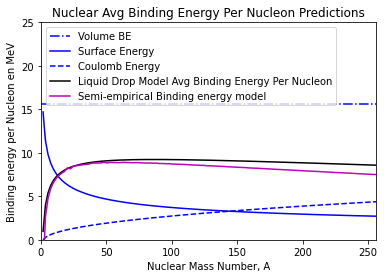

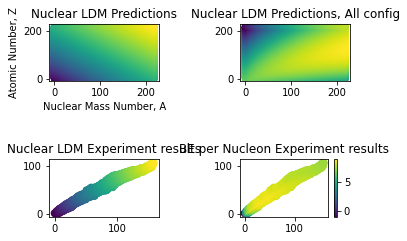

Text(0.5, 0, 'Atomic Number, Z')

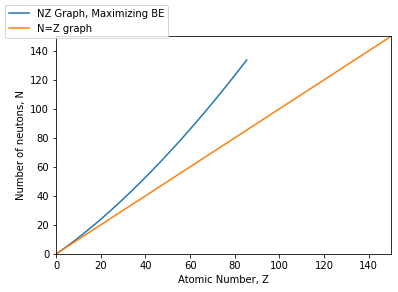

In [ ]:
#@title Nuclear Liquid Drop Model Predictions vs experiments
import warnings
warnings.filterwarnings('ignore')
display(IPython.display.HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Binding_energy_curve_-_common_isotopes.svg/500px-Binding_energy_curve_-_common_isotopes.svg.png">'))
#@markdown Binding energy function of the Nuclear Mass Number  A
Z=list(np.arange(0,220,1))
A=list(map(lambda x:1.61*(x**1.1),Z))  # Curve fitting of the N/Z graph
volume,surface,coulomb,asymmetric,pairing=15.67,17.23,0.714,23,11.2
def BE_perNucleon(A,Z):
  return volume,surface*A**(-1/3),Z*(Z-1)/A**(4/3)*coulomb,asymmetric*((A-2*Z)**2)/A**2,((A-Z)%2+Z%2-1)*pairing*((A)**(-3/2))

E_volume,E_surface,E_coulomb,E_asymmetric,E_pairing=np.transpose(list(map(BE_perNucleon,A,Z)))

plt.plot(A,E_volume,"b-.",label="Volume BE")
plt.plot(A,E_surface,"b-",label="Surface Energy")
plt.plot(A,E_coulomb,'b--',label="Coulomb Energy")
plt.plot(A,list(map(lambda v,s,c:v-s-c,E_volume,E_surface,E_coulomb)),'k-',label="Liquid Drop Model Avg Binding Energy Per Nucleon")
plt.plot(A,list(map(lambda v,s,c,a,p:v-s-c-a-p,E_volume,E_surface,E_coulomb,E_asymmetric,E_pairing)),'m-',label="Semi-empirical Binding energy model")


plt.legend(loc="upper left")

plt.title("Nuclear Avg Binding Energy Per Nucleon Predictions")
plt.xlabel("Nuclear Mass Number, A")
plt.ylabel("Binding energy per Nucleon en MeV")
plt.xlim(0,256)
plt.ylim(0,25)

plt.show()


######################################################################
#@markdown Binding energy function of the number of neutrons N and the Atomic Number Z 
# Lambda version bindingEnergy All possible Configurations
N=list(np.arange(0,220,1))*220
Z=[j for j in range(220) for i in range(220)]
volume,surface,coulomb,asymmetric,pairing=15.67,17.23,0.714,23,11.2
liquid_drop=lambda N_list,Z_list: [volume*(N+Z)-surface*((N+Z)**(2/3))-coulomb*Z*(Z-1)/((N+Z)**(1/3))-asymmetric*((N-Z)**2)/(N+Z)-(N%2+Z%2-1)*pairing*((N+Z)**(-1/2)) for N,Z in zip(N_list,Z_list)]

# helper functions to bindingEnergy, stable elements 
def zMinimum(A):
	return round(A / (0.5 * 0.711 / 23.7 * A ** (2 / 3) + 2))
def pair(Z, N):
	zParity = Z % 2
	nParity = N % 2
	if zParity == 0 and nParity == 0:
		return 1
	elif zParity != 0 and nParity != 0:
		return -1
	else:
		return 0
# __main__ function
def bindingEnergy(A):
  Z = zMinimum(A)
  N = A - Z
  volume = 15.75 * A
  surface = -17.8 * A ** (2 / 3)
  coulomb = -0.711 * Z ** 2 / A ** (1 / 3)
  asymmetric = -23.7 * (A - 2 * Z) ** 2 / A
  pairing = 11.18 * pair(Z, N) / A ** 0.5
  return volume + surface + coulomb + asymmetric + pairing

plt.xlim(0,150)
plt.ylim(0,150)

plt.subplot(2,2,1)
plt.scatter(N,Z,c=[bindingEnergy(n+z) for n,z in zip(N,Z)])
plt.xlabel("Nuclear Mass Number, A")
plt.ylabel("Atomic Number, Z")
plt.title("Nuclear LDM Predictions")

plt.subplot(2,2,2)
plt.scatter(N,Z,c=liquid_drop(N,Z))
plt.title("Nuclear LDM Predictions, All config")

n_exp,p_exp,bindindEnergy_exp,bindindEnergypernucleon_exp=[],[],[],[]

for i in binding.split("\n") : 
  j=i.split(" ")
  n_exp.append(int(j[0])-int(j[1]))
  p_exp.append(int(j[1]))
  bindindEnergy_exp.append(float(j[4]))
  bindindEnergypernucleon_exp.append(float(j[5]))

plt.subplot(2,2,3)
plt.scatter(n_exp,p_exp,c=bindindEnergy_exp)
plt.title("Nuclear LDM Experiment results")

plt.subplot(2,2,4)
plt.scatter(n_exp,p_exp,c=bindindEnergypernucleon_exp)
plt.title("BE per Nucleon Experiment results")

plt.tight_layout(pad=3.1)
plt.colorbar()
plt.show()

A=list(np.arange(0,220,1))
plt.plot(list(map(lambda a:a/(2+0.0156*a**(2/3)),A)),list(map(lambda a:a-a/(2+0.0156*a**(2/3)),A)),label="NZ Graph, Maximizing BE")
plt.plot(A,A,label="N=Z graph")
plt.figlegend(loc='upper left')
plt.xlim(0,150)
plt.ylim(0,150)
plt.ylabel("Number of neutons, N")
plt.xlabel("Atomic Number, Z")


# not finished

Text(0, 0.5, 'Velocity of the projectile in the ground Frame v1/c')

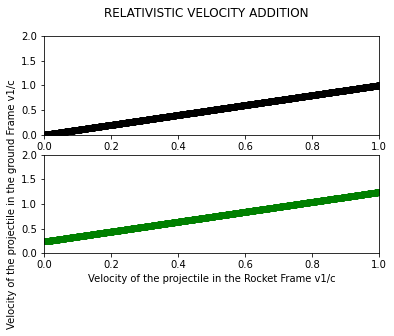

In [ ]:
#@title RELATIVISTIC VELOCITY ADDITION
Rocket_velocity = 22  #@param {type: "slider", min: 0, max: 100}
Projectile_velocity=47    #@param {type: "slider", min: 0, max: 100}
c=1    # Speed of light
Projectile_velocity/=100*c
Rocket_velocity/=100*c

Gamma=1/np.sqrt(1-Rocket_velocity**2)


# **Rocket Frame**
V_Rocket1=0
V_projectile1=lambda velocity:[i for i in velocity ]
# **Ground Frame**
V_Rocket=Rocket_velocity
V_projectile=lambda velocity:[Rocket_velocity+i for i in velocity]

x=np.arange(0,0.999,0.001)

plt.suptitle("RELATIVISTIC VELOCITY ADDITION")

plt.subplot(2,1,1)
plt.xlim(0,1)
plt.ylim(0,2)
plt.scatter(x,V_projectile1(x),color='k')

plt.subplot(2,1,2)
plt.xlim(0,1)
plt.ylim(0,2)
plt.scatter(x,V_projectile(x),color='g')

plt.xlabel("Velocity of the projectile in the Rocket Frame v1/c")
plt.ylabel("Velocity of the projectile in the ground Frame v1/c")





Text(0, 0.5, 'Velocity of the projectile in the ground Frame v1/c')

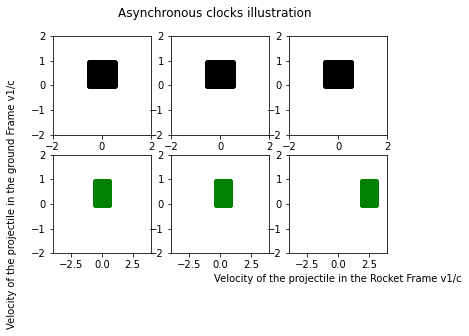

In [ ]:
#@title Asynchronous clocks illustration
Train_speed = 25  #@param {type: "slider", min: 0, max: 100}
c=1
Train_speed/=100*c

train_length=1
train_height=10
limit= lambda x,time: x+2*Train_speed*time

#Events As Seen From Train
train_from_inside=lambda train_height,train_width:list(np.arange(-train_length/2,train_length/2,train_length/100))*train_height
#Events As Seen From Ground
train_from_ground=lambda train_height,train_width,t:list(np.arange(-train_length/2+Train_speed*t,train_length/2+Train_speed*t,train_length/100))*train_height

train=[j/10  for j in range(train_height) for i in range(100)]

plt.suptitle("Asynchronous clocks illustration")

plt.subplot(2,3,1)
plt.scatter(train_from_inside(train_height,train_length),train,color='k')
plt.xlim(-limit(2,0),limit(2,0))
plt.ylim(-limit(2,0),limit(2,0))

plt.subplot(2,3,2)
plt.scatter(train_from_inside(train_height,train_length),train,color='k')
plt.xlim(-limit(2,0),limit(2,0))
plt.ylim(-limit(2,0),limit(2,0))

plt.subplot(2,3,3)
plt.scatter(train_from_inside(train_height,train_length),train,color='k')
plt.xlim(-limit(2,0),limit(2,0))
plt.ylim(-limit(2,0),limit(2,0))

plt.subplot(2,3,4)
plt.scatter(train_from_ground(train_height,train_length,0.1),train,color='g')
plt.xlim(-limit(4,0),limit(4,0))
plt.ylim(-limit(2,0),limit(2,0))

plt.subplot(2,3,5)
plt.scatter(train_from_ground(train_height,train_length,1),train,color='g')
plt.xlim(-limit(4,0),limit(4,0))
plt.ylim(-limit(2,0),limit(2,0))

plt.subplot(2,3,6)
plt.scatter(train_from_ground(train_height,train_length,10),train,color='g')
plt.xlim(-limit(4,0),limit(4,0))
plt.ylim(-limit(2,0),limit(2,0))

plt.xlabel("Velocity of the projectile in the Rocket Frame v1/c")
plt.ylabel("Velocity of the projectile in the ground Frame v1/c",labelpad=250)


# **Sort list without using list.sort**

In [ ]:
def bubbleSort(t):
    i,sorted=0,False
    while (i<len(t)-1 and not sorted):
        sorted,j=True,0
        while (j<len(t)-i-1):
            if (t[j]>t[j+1]):
                t[j],t[j+1]=t[j+1],t[j]
                sorted=False
            j+=1
        i+=1
    return t
####################################################################################################################################################################################################################################################
def combSort(t):
    gap,sorted=len(t)-1,False
    while(not sorted):
        gap=int(gap/1.3)
        if(gap<=1):
            gap,sorted=int(max(gap,1)),True
        j=0
        while(j<len(t)-gap):
            if (t[j]>t[j+gap]):
                t[j],t[j+gap]=t[j+gap],t[j]
                sorted=False
            j+=1
    return t

####################################################################################################################################################################################################################################################
def partition(array, start, end):
    pivot = array[start]
    low = start + 1
    high = end
    while True:
        while low <= high and array[high] >= pivot:
            high = high - 1
        while low <= high and array[low] <= pivot:
            low = low + 1
        if low <= high:
            array[low], array[high] = array[high], array[low]
        else:
            break
    array[start], array[high] = array[high], array[start]
    return high
def quick_sort(array, start, end):
    if start >= end:
        return
    p = partition(array, start, end)
    quick_sort(array, start, p-1)
    quick_sort(array, p+1, end)

**Replace With Alphabet Position**

Given a string, replace every letter with its position in the alphabet. (ignore non alphabetic characters)

In [ ]:
# def alphabet_position1(text):
#     print(functools.reduce(lambda x,y:x+' '+str(ord(y.lower())-96), list(text)))
def alphabet_position(text):
    text=text.lower()
    if (len(text)>1):
        return alphabet_position(text[:-1:])+' '+str(ord(text[-1])-96) if (text[-1]).isalpha() else alphabet_position(text[:-1:])
    else :
        return str(ord(text[-1])-96) if (text[-1]).isalpha() else ''

In [ ]:
#@title Sample Tests { display-mode: "form" }
from random import randint
test.assert_equals(alphabet_position("The sunset sets at twelve o' clock."), "20 8 5 19 21 14 19 5 20 19 5 20 19 1 20 20 23 5 12 22 5 15 3 12 15 3 11")
test.assert_equals(alphabet_position("The narwhal bacons at midnight."), "20 8 5 14 1 18 23 8 1 12 2 1 3 15 14 19 1 20 13 9 4 14 9 7 8 20")

number_test = ""
for item in range(10):
    number_test += str(randint(1, 9))
test.assert_equals(alphabet_position(number_test), "")

**Find The Parity Outlier**

You are given an array (which will have a length of at least 3, but could be very large) containing integers. The array is either entirely comprised of odd integers or entirely comprised of even integers except for a single integer N. Write a method that takes the array as an argument and returns this "outlier" N.

In [ ]:
#@title
def find_outlier(integers):
    mod2=lambda x:x%2
    regular=np.where(mod2(integers[0])+mod2(integers[1])+mod2(integers[2])<2,0,1)
    i=0
    while ((integers[i])%2==regular):
        i+=1
    return integers[i]

In [ ]:
#@title Sample Tests { display-mode: "form" }
test.assert_equals(find_outlier([2, 4, 6, 8, 10, 3]), 3)
test.assert_equals(find_outlier([2, 4, 0, 100, 4, 11, 2602, 36]), 11)
test.assert_equals(find_outlier([160, 3, 1719, 19, 11, 13, -21]), 160)

**Pig Latin**

Move the first letter of each word to the end of it, then add "ay" to the end of the word. Leave punctuation marks untouched.

In [ ]:
def pig_it(text):
  return  " ".join(i[1::]+i[0]+"ay" if i.isalpha() else i for i in list(text.split(' ')))  

In [ ]:
#@title Sample Tests { display-mode: "form" }
test.assert_equals(pig_it('Pig latin is cool'),'igPay atinlay siay oolcay')
test.assert_equals(pig_it('This is my string'),'hisTay siay ymay tringsay')

**Is a number prime?**

Define a function that takes one integer argument(positive or negative) and returns logical value true or false depending on if the integer is a prime.

In [ ]:
def is_prime(num):
    if (num<2 or num%2==0):
        return False or num==2
    for i in range(3,np.int(np.sqrt(np.float(num)))+1,2): # Explicit float casting to handle large numbers 
        if (num%i==0):
            return False
    return True

In [ ]:
#@title
largeNotPrime=238962445015
Product2LargePrime=8843789*1099859

running_time(is_prime,largePrime)
running_time(is_prime,largeNotPrime)
running_time(is_prime,Product2LargePrime)

True --- 0.041315555572509766 seconds ---
False --- 3.8623809814453125e-05 seconds ---
False --- 0.07434391975402832 seconds ---


In [ ]:
import random

def even_odd(n):
    s, d = 0, n
    while d % 2 == 0:
          s += 1
          d >>= 1
    return s, d

def Miller_Rabin(a, p):
    s, d = even_odd(p-1)
    a = pow(a, d, p)
    if a == 1: return True
    for i in range(s):
        if a == p-1: return True
        a = pow(a, 2, p)
    return False

def is_prime_Miller_Rabin(p):
    if p == 2: return True
    if p <= 1 or p % 2 == 0: return False
    return all(Miller_Rabin(random.randint(2,p-1),p) for _ in range(40))
is_prime_Miller_Rabin(7193460161740708249)

In [ ]:
#@title Sample Tests { display-mode: "form" }
@test.it("Basic tests")
def basic_tests():
    test.assert_equals(is_prime(0),  False, "0  is not prime")
    test.assert_equals(is_prime(1),  False, "1  is not prime")
    test.assert_equals(is_prime(2),  True, "2  is prime")
    test.assert_equals(is_prime(73), True, "73 is prime")
    test.assert_equals(is_prime(75), False, "75 is not prime")
    test.assert_equals(is_prime(-1), False, "-1 is not prime")


@test.it("Test prime")
def test_prime():
    test.assert_equals(is_prime(3),  True, "3  is prime");
    test.assert_equals(is_prime(5),  True, "5  is prime");
    test.assert_equals(is_prime(7),  True, "7  is prime");
    test.assert_equals(is_prime(41), True, "41 is prime");
    test.assert_equals(is_prime(5099), True, "5099 is prime");
    
@test.it("Test not prime")
def test_not_prime():
    test.assert_equals(is_prime(4),  False, "4  is not prime");
    test.assert_equals(is_prime(6),  False, "6  is not prime");
    test.assert_equals(is_prime(8),  False, "8  is not prime");
    test.assert_equals(is_prime(9), False, "9 is not prime");
    test.assert_equals(is_prime(45), False, "45 is not prime");
    test.assert_equals(is_prime(-5), False, "-5 is not prime");
    test.assert_equals(is_prime(-8), False, "-8 is not prime");
    test.assert_equals(is_prime(-41), False, "-41 is not prime");

# **The GCF (Greatest Common Factor) of any two numbers**

In [ ]:
def find_GCF(n1,n2):
  return find_GCF(min(n1,n2),max(n1,n2)-min(n1,n2)) if n1!=n2 else n1
def find_GCF(a, b):
    return find_GCF(b,a%b) if b else a

In [ ]:
#@title Sample Tests { vertical-output: true }
test.assert_equals(find_GCF(2, 4), 2)
test.assert_equals(find_GCF(8,20), 4);
test.assert_equals(find_GCF(5,13), 1);
test.assert_equals(find_GCF(100,100), 100);

# **Get the numbers from given GCD sum**
Given the sum and gcd of two numbers, return those two numbers in ascending order.

In [ ]:
def find_GCF(a, b):
    return find_GCF(b,a%b) if b else a

def solve(sum,gcf,index=0):
    return solve(sum-1,gcf,index+1) if (find_GCF(sum,index)!=gcf and index<=sum) else ((index,sum) if index<=sum else -1)

def solve1(sum,gcf):
    i=1
    while(find_GCF(sum-i,i)!=gcf and i<=sum/2):
        i+=1
    return (i,sum-i) if i<=sum/2 else -1



In [ ]:
#@title Sample Tests { vertical-output: true }
test.assert_equals(solve(6,3), (3,3))
test.assert_equals(solve(8,2), (2,6))
test.assert_equals(solve(10,3), -1)
test.assert_equals(solve(12,4), (4,8))
test.assert_equals(solve(12,5), -1)   


**Multiples of 3 or 5 below the number passed in**

If the number is negative, return 0.
If the number is a multiple of both 3 and 5, only count it once.

In [ ]:
def solution(number):
    return (int)(sum(np.concatenate((np.arange(3,number,3) , np.arange(5,number,5), -(np.arange(5,number,5)[2::3])),axis=0)))  if number>3 else 0
def solution1(number):
  return sum(x for x in range(number) if not (x%3 and x%5))

In [ ]:
#@title Sample Tests { display-mode: "form" }

test.assert_equals(solution(4), 3)


test.assert_equals(solution(6), 8)


test.assert_equals(solution(16), 60)


test.assert_equals(solution(3), 0)


test.assert_equals(solution(5), 3)


test.assert_equals(solution(15), 45)


test.assert_equals(solution(0), 0)


test.assert_equals(solution(-1), 0)


test.assert_equals(solution(10), 23)


test.assert_equals(solution(20), 78)


test.assert_equals(solution(200), 9168)


# **Calculating with Functions**

seven(times(five())) # must return 35

In [ ]:
identity=lambda a:a
number= lambda i:lambda f=identity:f(i)
zero, one, two, three, four, five, six, seven, eight, nine = map(number, range(10))
plus = lambda x: lambda y: y + x
minus = lambda x: lambda y: y - x
times = lambda x: lambda y: y * x
divided_by = lambda x: lambda y: y // x


In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.describe('Basic Tests')
test.assert_equals(seven(times(five())), 35)
test.assert_equals(four(plus(nine())), 13)
test.assert_equals(eight(minus(three())), 5)
test.assert_equals(six(divided_by(two())), 3)

# **Valid Braces**

An input is a nonempty string, and it will only consist of parentheses, brackets and curly braces: ()[]{}

A string of braces is considered valid if all braces are matched with the correct brace.

In [ ]:
# First solution
def validBraces(string):
    matched = {"(": ")", "[": "]", "{": "}"}
    closing=matched.values()
    accumulated=string[0]
    for i in string:
      if ((i in closing) and matched[accumulated[-1]]!=curChr):


    accumulated,current,length=string[0],1,len(string)
    while (current<length):
        curChr=string[current]
        if :
          return False
        current+=1
        if (accumulated=="" or matched[accumulated[-1]] in matched.values()):
            accumulated+=curChr
        else:
            accumulated=accumulated[:-1]
    return accumulated==""
# Second solution
def validBraces1(string):
    braces = {"(": ")", "[": "]"}
    stack = []
    for character in string:
        if character in braces.keys():
            stack.append(character)
        else:
            if len(stack) == 0 or bractextstack.pop()] != character:
                return False
    return len(stack) == 0 
"""
tree -> child or brother
string walk
math +-
from inside 2,4,6
"""

'\ntree -> child or brother\nstring walk\nmath +-\nfrom inside 2,4,6\n'

In [ ]:
running_time(validBraces1,1000*'([])')
running_time(validBraces,1000*'([])')

In [ ]:
running_time(validBraces1,'([])')
running_time(validBraces,'([])')

running_time(validBraces1,')'+10000000000000*'([])')
running_time(validBraces,')'+100*'([])')

running_time(validBraces1,'[({})](][({})](][({})](]')
running_time(validBraces,'[({})](][({})](][({})](]')

True --- 1.1444091796875e-05 seconds ---
True --- 1.0728836059570312e-05 seconds ---
False --- 5.9604644775390625e-06 seconds ---
False --- 0.0002105236053466797 seconds ---
False --- 9.5367431640625e-06 seconds ---
False --- 1.6927719116210938e-05 seconds ---


In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.assert_equals(validBraces("()"), True);
test.assert_equals(validBraces("[(])"), False);

# **Count the number of Duplicates**

A function that returns the count of distinct case-insensitive alphabetic characters and numeric digits that occur more than once in the input string. 
e.g. "indivisibility" -> 1 and "Indivisibilities" -> 2

In [ ]:
guard={'0': 0,'1': 0,'2': 0,'3': 0,'4': 0,'5': 0,'6': 0,'7': 0,'8': 0,'9': 0,'a': 0,'b': 0,'c': 0,'d': 0,'e': 0,'f': 0,'g': 0,'h': 0,'i': 0,'j': 0,'k': 0,'l': 0,'m': 0,'n': 0,'o': 0,'p': 0,'q': 0,'r': 0,'s': 0,'t': 0,'u': 0,'v': 0,'w': 0,'x': 0,'y': 0,'z': 0}
def duplicate_count1(text):
    return sum(1 for i in guard.keys() if text.lower().count(i)>1 )
def duplicate_count(text):
    for i in text.lower():
        if (guard.get(i)==None):
            pass
        elif (guard[i]==1):
            guard.pop(i) 
        else:
            guard[i]+=1
    return 36-len(guard)
'''
Two bits per letter to store its state
count(i), ∀i€{A..Z}
Dict(i:{0,1}), ∀i€{A..Z} --> Drop i when found for the second time: text with card(different letter) is high, and the letters are redundant
Dict --> Add i when found, i€{A..Z}: text with card(different letter) is low
'''

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
@test.describe("Fixed Tests")
def fixed_tests():
    @test.it("Basic Tests")
    def basic_tests():
        test.assert_equals(duplicate_count(""), 0)
        test.assert_equals(duplicate_count("abcde"), 0)
        test.assert_equals(duplicate_count("abcdeaa"), 1)
        test.assert_equals(duplicate_count("abcdeaB"), 2)
        test.assert_equals(duplicate_count("Indivisibilities"), 2)

# **Find the odd int**

Given an array of integers, find the one that appears an odd number of times.

In [ ]:
import numpy as np
def find_it(seq):
    return next(i  for i in seq if seq.count(i)%2==1)

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }


@test.describe("Sample tests")
def sample_tests():
    
    @test.it("find_it([20,1,-1,2,-2,3,3,5,5,1,2,4,20,4,-1,-2,5]) should return 5 (because it appears 3 times)")
    def _():
        test.assert_equals(find_it([20,1,-1,2,-2,3,3,5,5,1,2,4,20,4,-1,-2,5]), 5)
        
    @test.it("find_it([1,1,2,-2,5,2,4,4,-1,-2,5]) should return -1 (because it appears 1 time)")
    def _():
        test.assert_equals(find_it([1,1,2,-2,5,2,4,4,-1,-2,5]), -1);
        
    @test.it("find_it([20,1,1,2,2,3,3,5,5,4,20,4,5]) should return 5 (because it appears 3 times)")
    def _():
        test.assert_equals(find_it([20,1,1,2,2,3,3,5,5,4,20,4,5]), 5);
        
    @test.it("find_it([10]) should return 10 (because it appears 1 time)")
    def _():
        test.assert_equals(find_it([10]), 10);

    @test.it("find_it([10, 10, 10]) should return 10 (because it appears 3 times)")
    def _():
        test.assert_equals(find_it([10, 10, 10]), 10);        
        
    @test.it("find_it([1,1,1,1,1,1,10,1,1,1,1]) should return 10 (because it appears 1 time)")
    def _():
        test.assert_equals(find_it([1,1,1,1,1,1,10,1,1,1,1]), 10);

    @test.it("find_it([5,4,3,2,1,5,4,3,2,10,10]) should return 1 (because it appears 1 time)")
    def _():
        test.assert_equals(find_it([5,4,3,2,1,5,4,3,2,10,10]), 1);

# **JavaScript Array Filter**

In [ ]:
def get_even_numbers(arr):
    return [i for i in arr if i%2==0]

def get_even_numbers(arr):
    return list(filter(lambda x:(x+1)%2,arr))

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
@test.describe("Fixed Tests")
def fixed_tests():
    @test.it('Basic Test Cases')
    def basic_test_cases():
        test.assert_equals(get_even_numbers([2,4,5,6]), [2,4,6], "Returned list is incorrect")
        test.assert_equals(get_even_numbers([]), [], "Returned list is incorrect")
        test.assert_equals(get_even_numbers([1]), [], "Returned list is incorrect")
        test.assert_equals(get_even_numbers([1,2]), [2], "Returned list is incorrect")
        test.assert_equals(get_even_numbers([1,2,3,4,5]), [2,4], "Returned list is incorrect")
        test.assert_equals(get_even_numbers([2,4,6,8]), [2,4,6,8], "Returned list is incorrect")

# **Stanton measure**

Count the number of 1s in the array. Let this count be n. The Stanton measure is the number of times that n appears in the array.

In [ ]:

import numpy as np
def stanton_measure(arr):
    return arr.count(arr.count(1))

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.assert_equals(stanton_measure([1, 4, 3, 2, 1, 2, 3, 2]), 2)

# **Chicken Sexing**

Bob is a chicken sexer.
All of Bob's decisions will be checked against an expert's choices to generate a correctness score.

Scoring Rules
When they agree, he gets 1 point.
When they disagree but one has said '?' (can't guess), he gets 0.5 points.
When they disagree completely, he gets 0 points.

In [ ]:
def correctness(bobs_decisions, expert_decisions):   
    return sum([1 if bob_d==expert_d else 0.5*int(bob_d=="?" or expert_d=="?") for bob_d,expert_d in zip(bobs_decisions, expert_decisions)])

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.assert_equals(correctness(('M', 'F', '?'), ('M', 'F', '?')), 3)
test.assert_equals(correctness(('M', '?', 'M'), ('M', 'F', '?')), 2)
test.assert_equals(correctness(('F', 'M', 'F'), ('M', 'F', 'M')), 0)

# **Meeting**

s = "Fred:Corwill;Wilfred:Corwill;Barney:Tornbull;Betty:Tornbull;Bjon:Tornbull;Raphael:Corwill;Alfred:Corwill";

The program makes this string uppercase and sorts it in alphabetical order by last name. When the last names are the same, sort them by first name.

meeting(s)

"(CORWILL, ALFRED)(CORWILL, FRED)(CORWILL, RAPHAEL)(CORWILL, WILFRED)(TORNBULL, BARNEY)(TORNBULL, BETTY)(TORNBULL, BJON)"


In [ ]:
import numpy as np
def meeting(s):
    attendee_list = np.array([((i[i.index(":")+1:]).upper(),(i[:i.index(":")]).upper()) for  i in s.split(';')], dtype=[('last_name','U100'),('first_name','U100')])
    l=np.sort(attendee_list,order=['last_name','first_name'])
    return ("".join(i for i in list(filter(lambda x:x not in ('\'','\n','[',']') ,str(l))))).replace(") (",")(")

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
def testing(s, exp):
    print("Testing:\n" + s)
    ans = meeting(s)
    print("ACTUAL =\n%s" % (ans))
    print("EXPECT =\n%s" % (exp))
    print(ans == exp)
    test.assert_equals(ans, exp)

test.describe("meeting")
test.it("Basic tests")
def tests():
    testing("Alexis:Wahl;John:Bell;Victoria:Schwarz;Abba:Dorny;Grace:Meta;Ann:Arno;Madison:STAN;Alex:Cornwell;Lewis:Kern;Megan:Stan;Alex:Korn", 
            "(ARNO, ANN)(BELL, JOHN)(CORNWELL, ALEX)(DORNY, ABBA)(KERN, LEWIS)(KORN, ALEX)(META, GRACE)(SCHWARZ, VICTORIA)(STAN, MADISON)(STAN, MEGAN)(WAHL, ALEXIS)")
    testing("John:Gates;Michael:Wahl;Megan:Bell;Paul:Dorries;James:Dorny;Lewis:Steve;Alex:Meta;Elizabeth:Russel;Anna:Korn;Ann:Kern;Amber:Cornwell", 
        "(BELL, MEGAN)(CORNWELL, AMBER)(DORNY, JAMES)(DORRIES, PAUL)(GATES, JOHN)(KERN, ANN)(KORN, ANNA)(META, ALEX)(RUSSEL, ELIZABETH)(STEVE, LEWIS)(WAHL, MICHAEL)")
    testing("Alex:Arno;Alissa:Cornwell;Sarah:Bell;Andrew:Dorries;Ann:Kern;Haley:Arno;Paul:Dorny;Madison:Kern", 
        "(ARNO, ALEX)(ARNO, HALEY)(BELL, SARAH)(CORNWELL, ALISSA)(DORNY, PAUL)(DORRIES, ANDREW)(KERN, ANN)(KERN, MADISON)")

tests()
print("<COMPLETEDIN::>")
print("<COMPLETEDIN::>")

# **Alphabetical Grid**
Grid returns an alphabetical grid of size NxN, where a = 0, b = 1, c = 2...
After "z" comes "a"

grid(4)
```
a b c d
b c d e
c d e f
d e f g

```



In [ ]:
def grid(N):
    return None if N<0 else  "\n".join(" ".join(chr(97+i%26) for i in range(j,N+j)) for j in range(N))

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }

test.assert_equals(grid(0), '')
test.assert_equals(grid(1), 'a')
test.assert_equals(grid(2), 'a b\nb c')
test.assert_equals(grid(4), 'a b c d\nb c d e\nc d e f\nd e f g')
test.assert_equals(grid(6), 'a b c d e f\nb c d e f g\nc d e f g h\nd e f g h i\ne f g h i j\nf g h i j k')

test.assert_equals(grid(-1), None)
test.assert_equals(grid(-5), None)

# **Design an Automaton (Finite State Machine)**
q1 is our start state, we begin reading commands from here

q2 is our accept state, we return true if this is our last state

*   q1 moves to q2 when given a 1, and stays at q1 when given a 0

*   q2 moves to q3 when given a 0, and stays at q2 when given a 1

*   q3 moves to q2 when given a 0 or 1



In [ ]:
class Automaton(object):

    def __init__(self):
        self.states = []
    
    def q2_strikes_back(self,s):
        if len(s)==1: return True
        if len(s)==0: return False    
        transition2q3=s.find('0')+1
        return self.q2_strikes_back(s[transition2q3:]) 
    
    def read_commands(self, commands):
        cmd="".join(i for i in commands)
        transition2q2=cmd.find('1')+1                      # In case "1" is the first char, the result is False => +1  
        transition2q3=cmd.find('0',transition2q2)+1    # A zero modulo 2 is True whereas it is False for python => no -1

        return  bool(transition2q2 and not (transition2q3)) or bool(transition2q2*transition2q3 and self.q2_strikes_back(cmd[transition2q3:]))
my_automaton = Automaton()

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }

test.assert_equals(my_automaton.read_commands(["1"]), True)
test.assert_equals(my_automaton.read_commands(["1", "0", "0", "1"]), True)

# **Phone Numbers**  Ascending difficulty

**Create Phone Number**

A function that accepts an array of 10 integers (between 0 and 9), that returns a string of those numbers in the form of a phone number.

**Valid Phone Number**

A function that accepts a string, and returns true if it is in the form of a phone number.
Assume that any integer from 0-9 in any of the spots will produce a valid phone number.

**Is that a real phone number? (British version)**

A UK mobile numbers begin with '07' followed by 9 other digits

Sometimes the number is preceded by the country code, the prefix '+44', which replaces the '0' in ‘07’, e.g. '+447454876120'.

Some other times the numbers can be seperated with dashes.

If valid, return 'In with a chance' else return 'Plenty more fish in the sea'.

**Duplicate Phone Numbers**

Businesses like to have memorable telephone numbers. One way to make a telephone number memorable is to have it spell a memorable word or phrase.



```
A, B, and C map to 2
D, E, and F map to 3
G, H, and I map to 4
J, K, and L map to 5
M, N, and O map to 6
P, R, and S map to 7
T, U, and V map to 8
W, X, and Y map to 9
letters can be uppercase or lowercase
There is no mapping for Q(q) or Z(z)
```
Output: The duplicate telephone number list. Arrange the output string by telephone number in ascending lexicographical order. If there are no duplicates in the input return []

**Saving memory by acting on contacts numbers**

The goal is to save the phone numbers by keeping in common the same parts thus reducing the total size of the repertory.



```
0123456789 0123987654 0123987456 2365498756 2365498765

               4 - 5 - 6 - 7 - 8 - 9           
0 - 1 - 2 - 3 <
                \            4 - 5 - 6
                  9 - 8 - 7 < 
                             6 - 5 - 4
  
                               6 - 5
2 - 3 - 6 - 5 - 4 - 9 - 8 - 7 <
                               5 - 6
```







In [ ]:
def create_phone_number(n):
    return "("+"".join(str(i) for i in n[:3])+") "+"".join(str(i) for i in n[3:6])+"-"+"".join(str(i) for i in n[6:])

def valid_phone_number(phone_number):
    return len(phone_number)==14 and re.findall("\(\d{3}\)\ \d{3}-\d{4}",phone_number)!=[]
20
def validate_number(string): # Is that a real phone number? (British version)
    string=string.replace("-","")
    return "In with a chance" if ( (len(string[string.find('7')+1:])==9) and ((re.findall("07\d{9}",string)!=[]) or (re.findall("\+447\d{9}",string)!=[])) )  else "Plenty more fish in the sea"

def find_duplicate_phone_numbers(phone_numbers):
    phone_numbers_restored=["".join( j if j.isnumeric()  else ( str((ord(j.lower())-97)//3 +2) if (ord(j.lower())<114) else str((ord(j.lower())-98)//3 +2) )  for j in i if j!="-") for i in phone_numbers]
    return list(np.sort([f'{i[:3]}-{i[3:]}:{phone_numbers_restored.count(i)}' for i in np.unique(phone_numbers_restored) if phone_numbers_restored.count(i)>1 ]))
# Sort and delete all occurence while looping

In [ ]:
??
if a in b not from the start

In [ ]:
a5=['012', '0123', '01234']
[*a5]

['012', '0123', '01234']

In [ ]:
def common_simplification(cur,target):
    if target=="": return ''
    
    i=0
    while(  (i <len(cur)) and (cur[i]==target[i])  ):
        i+=1
    return target[i:]

def phone_number(phone_numbers):
    global tracked={}
    tracked={phone_numbers[i]:None for i in range(len(phone_numbers)) }
    
    def recursive():
        
        if (len(tracked)==1): return len(list(tracked.keys())[0])

        cur=tracked.popitem()[0]

        for target in  tracked.keys():
            if (tracked[target] == 0):
            common_simplification(cur, tracked[target]) 

        return len(cur)+recursive(phone_numbers)


{0: 10, 1: 1, 2: 2, 3: 3}

In [ ]:
def common_simplification(cur,target):
    if target=="": return ''
    i=0
    while(  (i <len(cur)) and (cur[i]==target[i])  ):
        i+=1
    return target[i:]

def phone_number(phone_numbers):
    if (len(phone_numbers)==1): return len(phone_numbers[0])
 
    cur=phone_numbers.pop(0)
    
    keep_track=[0]*len(phone_numbers)

    phone_numbers=[*map(common_simplification,[cur]*len(phone_numbers),phone_numbers)]
    
    return len(cur)+phone_number(phone_numbers)


In [ ]:
a5=['012', '0123', '01234']

In [ ]:
#@title Sample Tests : Create Phone Number { vertical-output: true, display-mode: "form" }
@test.describe("Create Phone Number")
def fixed_tests():
    @test.it('Basic Test Cases')
    def basic_test_cases():
        test.assert_equals(create_phone_number([1, 2, 3, 4, 5, 6, 7, 8, 9, 0]), "(123) 456-7890")
        test.assert_equals(create_phone_number([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), "(111) 111-1111")
        test.assert_equals(create_phone_number([1, 2, 3, 4, 5, 6, 7, 8, 9, 0]), "(123) 456-7890")
        test.assert_equals(create_phone_number([0, 2, 3, 0, 5, 6, 0, 8, 9, 0]), "(023) 056-0890")
        test.assert_equals(create_phone_number([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), "(000) 000-0000")


In [ ]:
#@title Sample Tests : Valid Phone Number { vertical-output: true, display-mode: "form" }

test.assert_equals(valid_phone_number("(123) 456-7890"),       True)
test.assert_equals(valid_phone_number("(1111)555 2345"),       False)
test.assert_equals(valid_phone_number("(098) 123 4567"),       False)
test.assert_equals(valid_phone_number("(123)456-7890"),        False)
test.assert_equals(valid_phone_number("abc(123)456-7890"),     False)
test.assert_equals(valid_phone_number("(123)456-7890abc"),     False)
test.assert_equals(valid_phone_number("abc(123)456-7890abc"),  False)
test.assert_equals(valid_phone_number("abc(123) 456-7890"),    False)
test.assert_equals(valid_phone_number("(123) 456-7890abc"),    False)
test.assert_equals(valid_phone_number("abc(123) 456-7890abc"), False)
test.assert_equals(valid_phone_number("(333) 185-0594"),       True)

In [ ]:
valid_phone_number(create_phone_number([random.randint(0,9) for _ in range(10) ]))

In [ ]:
#@title Sample Tests : Is that a real phone number? (British version){ vertical-output: true, display-mode: "form" }

test.describe("Basic tests")
test.assert_equals(validate_number("07454876120"), "In with a chance")
test.assert_equals(validate_number("0754876120"), "Plenty more fish in the sea")
test.assert_equals(validate_number("0745--487-61-20"), "In with a chance")
test.assert_equals(validate_number("+447535514555"), "In with a chance")
test.assert_equals(validate_number("-07599-51-4555"), "In with a chance")
test.assert_equals(validate_number("075335440555"), "Plenty more fish in the sea")
test.assert_equals(validate_number("+337535512555"), "Plenty more fish in the sea")
test.assert_equals(validate_number("00535514555"), "Plenty more fish in the sea")
test.assert_equals(validate_number("+447+4435512555"), "Plenty more fish in the sea", "Not a Briish prefix")
test.assert_equals(validate_number("+44"), "Plenty more fish in the sea", "Not a Briish prefix")

In [ ]:
#@title Sample Tests : Duplicate Phone Numbers (British version){ vertical-output: true, display-mode: "form" }

test.it("Basic Tests")
testarr = [
"7399425",
"SEXY-GAL",
"Sexy-GAL",
"sexy-gal",
"SEXY-425",
"S-E-X-Y-G-A-L"
]
result = [
"739-9425:6"]
test.assert_equals(find_duplicate_phone_numbers(testarr),result)


testarr = [
"4873279",
"ITS-EASY",
"888-4567",
"3-10-10-10",
"888-GLOP",
"TUT-GLOP",
"967-11-11",
"310-GINO",
"F101010",
"888-1200",
"-4-8-7-3-2-7-9-",
"487-3279"]
result = [
"310-1010:2",
"487-3279:4",
"888-4567:3"]
test.assert_equals(find_duplicate_phone_numbers(testarr),result)

In [ ]:
#@title Sample Tests : Saving memory by acting on contacts numbers { vertical-output: true, display-mode: "form" }


sample_test_cases = [
#          phone_numbers         result
    ('Basic tests', [
        (['0', '1'],                2),
        (['01', '02', '03'],        4),
        (['012', '0123', '01234'],  5),
        (['111', '112', '113',
          '121', '122', '123'],     9),
    ]),
    ('Example in description', [
        ([
            '0123456789',
            '0123987654',
            '0123987456',
            '2365498756',
            '2365498765'],         31),
    ]),
    ('Other tests', [
        ([
            '0136','0137','0138',
            '0139','0146','0147',
            '0148','0149','0156',
            '0157','0158','0159',
            '0236','0237','0238',
            '0239','0246','0247',
            '0248','0249','0256',
            '0257','0258','0259'], 33),
        ([
            '23307055',
            '23707015',
            '23707055',
            '23707955',
            '23717055',
            '23807055',
            '83707055',
            '93707055'],           46),
        ([
            '10548970',
            '10946970',
            '10948770',
            '10948910',
            '10948960',
            '10948970',
            '10948976',
            '10948979',
            '40948970'],           35),
        ([
            '476649781929',
            '476646281929',
            '476649284929',
            '476649251929',
            '476649281429',
            '476649981929',
            '476649285929',
            '476649281909',
            '476649681929'],       53),
        ([
            '3',
            '99635',
            '454381',
            '45812',
            '4039173',
            '92',
            '777',
            '341944727',
            '5358',
            '882',
            '68',
            '684671',
            '8385687'],            52),
    ]),
]

@test.describe('Sample tests')
def sample_tests():
    for name, test_cases in sample_test_cases:
        @test.it(name)
        def tests():
            for numbers, expected in test_cases:
                test.assert_equals(phone_number(numbers), expected)

# **The observed PIN**

Input: observed PIN with a length of 1 to 8 digits.

Each of the digits could actually be another adjacent digit (horizontally or vertically, but not diagonally)

Output: all possible PINs

The keypad has the following layout:
```
┌───┬───┬───┐
│ 1 │ 2 │ 3 │
├───┼───┼───┤
│ 4 │ 5 │ 6 │
├───┼───┼───┤
│ 7 │ 8 │ 9 │
└───┼───┼───┘
    │ 0 │
    └───┘
```


In [ ]:
variations={'0': ['0', '8'],'1': ['1', '2', '4'],'2': ['2', '1', '3', '5'],'3': ['3', '2', '6'],'4': ['4', '5', '1', '7'],'5': ['5', '4', '6', '2', '8'], '6': ['6', '5', '3', '9'],'7': ['7', '8', '4'],'8': ['8', '7', '9', '5', '0'],'9': ['9', '8', '6']}
combine=lambda l1,l2:list((" ".join(i+j for i in l1 for j in l2)).split(" "))
def get_pins(observed):
    if(len(observed)==1):
        return variations[(observed[0])]
    else :
        return combine(variations[(observed[0])],get_pins(observed[1:]))
# def variations_generator(l):
#     variations={"0":["0","8"]}
#     for i in range(len(l)-1):
#         for j in range(len(l[i])):
#             values=[l[i][j]]
#             if ((j-1)>=0):  
#                 values.append(l[i][j-1])
#             if (j<(len(l[i])-1)):  
#                 values.append(l[i][j+1])
#             if ((i-1)>=0 and j<len(l[i-1])):  
#                 values.append(l[i-1][j])
#             if ((i+1)<len(l) and j<len(l[i+1]) and l[i+1][j]!=None):  
#                 values.append(l[i+1][j])     
#             variations.update({l[i][j]:values})
#     return variations
# l=[["1","2","3"],["4","5","6"],["7","8","9"],[None,"0"]]
# variations=variations_generator(l) 

In [ ]:
from itertools import product

ADJACENTS = ('08', '124', '2135', '326', '4157', '52468', '6359', '748', '85790', '968')

def get_pins(observed):
    return [''.join(p) for p in product(*(ADJACENTS[int(d)] for d in observed))]

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.describe('example tests')
expectations = [('8', ['5','7','8','9','0']),
                ('11',["11", "22", "44", "12", "21", "14", "41", "24", "42"]),
                ('369', ["339","366","399","658","636","258","268","669","668","266","369","398","256","296","259","368","638","396","238","356","659","639","666","359","336","299","338","696","269","358","656","698","699","298","236","239"])]

for tup in expectations:
    test.assert_equals(sorted(get_pins(tup[0])), sorted(tup[1]), 'PIN: ' + tup[0])


# **Pick peaks**
A function that returns the positions and the values of the "peaks" (or local maxima) of a numeric array. {pos: [], peaks: []}

The first and last elements of the array will not be considered as peaks 

In case of a plateau-peak, only return the position and value of the beginning of the plateau.

In [ ]:
def pick_peaks(arr):
    peaks={'pos': [], 'peaks': []}
    i=1
    while (i<len(arr)-1):
        startingIndex=i
        while (i<len(arr)-2 and arr[i]==arr[i+1]):i+=1
        if (arr[i]>arr[startingIndex-1] and arr[i]>arr[i+1]) :
            (peaks['pos']).append(startingIndex)
            (peaks['peaks']).append(arr[startingIndex])
        i+=1
    return peaks



In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.assert_equals(pick_peaks([1,2,3,6,4,1,2,3,2,1]), {"pos":[3,7], "peaks":[6,3]})
test.assert_equals(pick_peaks([3,2,3,6,4,1,2,3,2,1,2,3]), {"pos":[3,7], "peaks":[6,3]})
test.assert_equals(pick_peaks([3,2,3,6,4,1,2,3,2,1,2,2,2,1]), {"pos":[3,7,10], "peaks":[6,3,2]})
test.assert_equals(pick_peaks([2,1,3,1,2,2,2,2,1]), {"pos":[2,4], "peaks":[3,2]})
test.assert_equals(pick_peaks([2,1,3,1,2,2,2,2]), {"pos":[2], "peaks":[3]})
test.assert_equals(pick_peaks([2,1,3,2,2,2,2,5,6]), {"pos":[2], "peaks":[3]})
test.assert_equals(pick_peaks([2,1,3,2,2,2,2,1]), {"pos":[2], "peaks":[3]})
test.assert_equals(pick_peaks([1,2,5,4,3,2,3,6,4,1,2,3,3,4,5,3,2,1,2,3,5,5,4,3]), {"pos":[2,7,14,20], "peaks":[5,6,5,5]})
test.assert_equals(pick_peaks([]),{"pos":[],"peaks":[]})
test.assert_equals(pick_peaks([1,1,1,1]),{"pos":[],"peaks":[]})

# **A Chain adding function**

A function that will add numbers together when called in succession

add(1)(2)(3)(4)(5); // 15

In [ ]:
class add(int):
    def __call__(self,n):
        return add(self+n)
# def add(x=0,cnt=0,opcnt=0):
#       return lambda y: add(x+y,cnt+1) if cnt<opcnt else x

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.assert_equals(add(1), 1)
test.assert_equals(add(1)(2), 3)
test.assert_equals(add(1)(2)(3), 6)

# **Pete, the baker**

how many cakes could be baked with a certain recipe? 
Input: an object recipe and n object available ingredients

In [ ]:
def cakes(recipe, available):
    return min (available.get(key,0) // value for key,value in recipe.items() )

def cakes1(recipe, available):
    if not ( recipe.keys() <= available.keys() ):
        return 0
    lastkey,lastvalue=recipe.popitem()
    count=available[lastkey] // lastvalue 
    for key,value in recipe.items():
        if ((available[key] / value) < count) : 
            count=(available[key] // value)
    return count

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }

recipe = {"flour": 500, "sugar": 200, "eggs": 1}
available = {"flour": 1200, "sugar": 1200, "eggs": 5, "milk": 200}
test.assert_equals(cakes(recipe, available), 2, 'example #1')

recipe = {"apples": 3, "flour": 300, "sugar": 150, "milk": 100, "oil": 100}
available = {"sugar": 500, "flour": 2000, "milk": 2000}
test.assert_equals(cakes(recipe, available), 0, 'example #2')

# **Pete, the baker (part 2)**
Pete is now mixing the cake mixture. He also might have added some of the ingredients already, but something is missing. Can you help him to find out?
Pete only wants to bake whole cakes. And ingredients, that were added once to the mixture, can't be removed from that.
If Pete already added all ingredients for an integer amount of cakes, return an empty hash.
If Pete didn't add any ingredients at all, you need to add all ingredients for exactly one cake.

In [ ]:
import numpy as np
import itertools 

def get_missing_ingredients(recipe, added):

    m=max(itertools.chain((np.ceil(added[i]/recipe[i]) for i in added.keys() if i in recipe.keys()),{1}) )
    return {i:m*recipe[i] if (i not in added.keys()) else recipe[i]-np.floor(added[i]%recipe[i])+(m-np.floor(added[i]/recipe[i])-1)*recipe[i] for i in recipe.keys() if (i not in added) or ((i in added) and ((added[i]%recipe[i]!=0) or (np.ceil(added[i]/recipe[i])!=m)))  }

'''
Get the cakes order count "m"

itertools.chain(...{1}) in case none of the required ingredients are added
"If Pete didn't add any ingredients at all, you need to add all ingredients for exactly one cake."

If an ingredient is already there -> 
add an amount so that it is enough for his latest cake 
add "m" minus the count of the already added required amounts

If an ingredient isn't, already, added -> 
add "m" of its required amount

'''
def get_missing_ingredients(recipe, added):
    m=max(itertools.chain((np.ceil(added[i]/recipe[i]) for i in added.keys() if i in recipe.keys()),{1}) )

    missing={}
    for i in recipe.keys() :
        if (i in added.keys()) :           
            x=recipe[i]-np.floor(added[i]%recipe[i])+(m-np.floor(added[i]/recipe[i])-1)*recipe[i]
            if (x!=0):
                missing[i]=x
                
        else :
            missing[i]=m*recipe[i]  
    return missing


In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
# -*- coding: utf-8 -*-
recipe = {"flour": 200, "eggs": 1, "sugar": 100}
print('should return missing ingredients, when something is missing for 1 cake')
test.assert_equals(get_missing_ingredients(recipe, {"flour": 100}), {"flour": 100, "eggs": 1, "sugar": 100})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 200, "sugar": 100}), {"eggs": 1})
  
print('should return no missing ingredients, when enough was added for integer amount of cakes')
test.assert_equals(get_missing_ingredients(recipe, {"flour": 200, "eggs": 1, "sugar": 100}), {})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 400, "eggs": 2, "sugar": 200}), {})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 1000, "eggs": 5, "sugar": 500}), {})
  
recipe = {"flour": 200, "eggs": 1, "sugar": 100}
print('should return missing ingredients, when something is missing for 1 cake')
test.assert_equals(get_missing_ingredients(recipe, {"flour": 100}), {"flour": 100, "eggs": 1, "sugar": 100})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 200, "sugar": 100}), {"eggs": 1})
  
print('should return no missing ingredients, when enough was added for integer amount of cakes')
test.assert_equals(get_missing_ingredients(recipe, {"flour": 200, "eggs": 1, "sugar": 100}), {})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 400, "eggs": 2, "sugar": 200}), {})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 1000, "eggs": 5, "sugar": 500}), {})
  
print('should return no missing ingredients for next integer amount of cakes')
test.assert_equals(get_missing_ingredients(recipe, {"flour": 199, "eggs": 1, "sugar": 100}), {"flour": 1})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 1, "eggs": 2, "sugar": 200}), {"flour": 399})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 123, "eggs": 70}), {"flour": 13877, "sugar": 7000})
print('should return no missing ingredients for next integer amount of cakes')
test.assert_equals(get_missing_ingredients(recipe, {"flour": 199, "eggs": 1, "sugar": 100}), {"flour": 1})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 1, "eggs": 2, "sugar": 200}), {"flour": 399})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 123, "eggs": 70}), {"flour": 13877, "sugar": 7000})

# **Roman Numerals Helper**

Create a RomanNumerals class that can convert a roman numeral to and from an integer value

I	1
IV 4
V	5
X	10
L	50
C	100
D	500
M	1000

Modern Roman numerals are written by expressing each digit separately starting with the left most digit and skipping any digit with a value of zero. In Roman numerals 1990 is rendered: 1000=M, 900=CM, 90=XC; resulting in MCMXC. 2008 is written as 2000=MM, 8=VIII; or MMVIII. 1666 uses each Roman symbol in descending order: MDCLXVI


In [ ]:
class RomanNumerals:

    def to_roman(val):
        return ''

    def from_roman(roman_num):
        return 0

In [ ]:
conversionT={'I':1, 'V':5,'X':10, 'L':50, 'C':100, 'D':500, 'M':1000}
class RomanNumerals:
    def to_roman(val):
        roman=''
        for i in [1,10,100,1000] :
            under_microscope=(val%(i*10))//i
            if not under_microscope:
              pass
            elif under_microscope==4 or under_microscope==9:
              roman+=conversionT[i]+conversionT[i*(under_microscope+1)]
            else :
              roman+=conversionT[i]*(under_microscope%5)+conversionT.get(conversionT[i],"")
        return roman


In [ ]:
https://www.codewars.com/kata/51b66044bce5799a7f000003/train/python

# **Permutations**
Create all permutations of an input string and remove duplicates, if present. 

In [ ]:
import itertools
import numpy as np

def permutations(string):
    return np.unique( list(''.join(i) for i in itertools.permutations(string)) )
####################################################################################################################################################################################

def permutations(L):
    N = len(L)
    idx = [0 for i in range(N)]
    result = [L]
    i = 1
    while i < N:
        if idx[i] < i:
            L = list(L)
            swap = i % 2 * idx[i]
            L[swap], L[i] = L[i], L[swap]
            result.append(L)
            idx[i] += 1
            i = 1
        else:
            idx[i] = 0
            i += 1
    return result
##########################################################################################
def permutations(s):
    if len(s) == 0:
        return []
    elif len(s) == 1:
        return [s]
    else:
        return set(s[i]+p for i in range(len(s)) for p in permutations(s[:i] + s[i+1:]))
"""
k! premières permutations ne change pas les n-k derniers elements
"""

"""
def fact(n):
  return n*fact(n-1) if n else 1


def permut_i(c,output,length,pos):#pos=pos%length  - modification position pour creer un non pattern
    m=-1
    for i in range(length):    
        for j in range(fact(length-1)):
            pos+=1
            if (pos>=length):
                pos=0 
            m+=1
            print(m,pos)
            output[m][pos]=c 
            output[m+length][pos]=c
def permutations(string):
    length=len(string)
    input=list(string)
    output=np.zeros((fact(length),length),dtype=str)
    for pos,c in enumerate(string):
        permut_i(c,output,length,pos-1)
    return output
"""

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.assert_equals(sorted(permutations('a')), ['a']);
test.assert_equals(sorted(permutations('ab')), ['ab', 'ba'])
test.assert_equals(sorted(permutations('aabb')), ['aabb', 'abab', 'abba', 'baab', 'baba', 'bbaa'])

# **Strip Comments**

Complete the solution so that it strips all text that follows any of a set of comment markers passed in. Any whitespace at the end of the line should also be stripped out.

In [ ]:
def solution(string,markers):
    return "\n".join((line[:min([line.find(i) for i in markers if line.find(i)>=0 ]+[len(line)])]).strip(' ')  for line in list(string.split('\n')))

# def solution(string,markers):
#     ch,previous,nextstart="",0,0
#     markers="".join(i*string.count(i) for i in markers)
#     for i in markers:
#           index=string.find(i,previous)
#           ch+=(string[nextstart:index]).strip(" ")
#           nextstart=string.find("\n",index)
#           previous=index+1
#     return ch

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
# -*- coding: utf-8 -*-
test.assert_equals(solution("apples, pears # and bananas\ngrapes\nbananas !apples", ["#", "!"]), "apples, pears\ngrapes\nbananas")
test.assert_equals(solution("a #b\nc\nd $e f g", ["#", "$"]), "a\nc\nd")

# **Web Scraping and Optimization for REALTY INVESTING** 

In [ ]:
# %%sh
# pip install selenium 
# pip install webdriver-manager
# pip install cloudscraper

import html5lib, lxml, requests , re, cloudscraper, os, csv, time, sys, random
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep
import os,sys,shlex,subprocess,argparse,time,pandas
from numpy.random import randint
from socket import timeout


url = "https://www.logic-immo.com/vente-immobilier-0,1_0/options/groupprptypesids=1"

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)
sleep(20)
p_element = driver.find_element_by_id(id_="add-to-selection")
print(p_element)

scraper = cloudscraper.create_scraper()
source= scraper.get(url).text

#source=requests.get("https://scrapeme.live/shop/").text

extacted_data='extacted_data.csv'
header=np.where(os.path.exists(extacted_data),0,1)
with open(extacted_data, 'a', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # Other available data: energy_letter, client_type, client_id, position, media
    #writer.writerow(['list_name','position','price','estate_type','distribution_type','space','id','id_solo','client_id','photos_nb','estate_postalcode','client_postalcode','country','client_type','parent_site','floor_nb','nb_rooms','nb_bedrooms','energy_letter','product_status','media','product_type']) if header else None
    writer.writerow(['price','estate_type','distribution_type','space','id_solo','photos_nb','floor_nb','nb_rooms','nb_bedrooms','estate_postalcode','url2post','region']) if header else None
    hourlylimit_supervisor=0
    for code_region in range(5,24):
        page=0
        time.sleep(10)
        
        annonces=[-1] 
        while(annonces!=[]):

            # to avoid being blocked and having to solve captcha            
            # if (hourlylimit_supervisor>390):
            #   hourlylimit_supervisor=0
            #   sleep(7200)


            # random clicks to avoid a detection of a crawling pattern
            

            random_url = f"https://www.logic-immo.com/vente-immobilier-0,{random.randint(1,23)}_0/options/groupprptypesids={random.randint(1,23)}/page={random.randint(1,23)}"
            requests.get(random_url).text

            # to be gentle with the site and to emulate a human behavior
            time.sleep(15) 

            page+=1
            url = f"https://www.logic-immo.com/vente-immobilier-0,{code_region}_0/options/groupprptypesids=1/page={page}"
            scraper = cloudscraper.create_scraper()
            source= scraper.get(url).text

            soup=bs(source,'lxml')
            annonces=soup.find_all("a", class_="add-to-selection")

            for annonce in annonces:    

                hourlylimit_supervisor+=1

                target_field=str(annonce).split("{")[3]
                target_data=re.findall(r':([0-9]+)', target_field)
                target_data.pop(0)                  #remove position
                target_data.pop()                   #remove media
                if (len(target_data)<9):            # -1 if floor_nb is not defined
                    target_data.insert(6,-1) 
                elif (len(target_data)>9):         
                    target_data.pop()

                target_data+=re.findall(r'.*estate_postalcode.:\'([\d]+)', target_field) # Preserve the estate_postalcode
                
                id=target_field[target_field.find("id")+5:target_field.find("id_")-3]
                url2post="https://www.logic-immo.com/detail-vente-"+id+".htm"
                target_data.append(url2post)
                target_data.append(code_region)
                writer.writerow(target_data)

"""
Variables: proposed_price(), apport_complementaire
Input: duree_2possession
From databases: id, price, surface, prix_2ref_moyen_m2,val_loc_indicative_m2, url2post,estate_postalcode

other existing information 
        # estate_type
        # distribution_type: 1 location, 2 vente
        # photos_nb
        # floor_nb
        # nb_rooms
        # nb_bedrooms

Might be useful if found: 
        # historique/ the amount deemed necessary for repairs
        # Economy/ Market outlook on real estate
        # Future estimations of demographics, Government Policies

"""


duree_pret_en_Mois=180
interets=1.03
interets_mensuel=interets/1200
assurance_Pret=0.273
caution_PPD,levee_PPD=2500,2500
penalités_RA=0.03

annuite=interets_mensuel/(1-(1+interets_mensuel)**(-duree_pret_en_Mois))


frais_dagence=10000
pourcentage_commission=0.0799
charge=75
taux_fonciere=33.3

taux_occupation=0.8

class Bien():
    def __init__(self,apport_complementaire,price,surface,estate_postalcode,url2post,prix_2ref_moyen_m2,val_loc_indicative_m2):

        self.price=price
        self.surface=surface
        self.estate_postalcode=estate_postalcode
        self.url2post=url2post

        self.apport_complementaire=apport_complementaire

        self.prix_2ref_moyen_m2=int(prix_2ref_moyen_m2)
        self.val_loc_indicative_m2=val_loc_indicative_m2

    market_value=lambda self:self.prix_2ref_moyen_m2*self.surface 
    worth_it=lambda self:self.market_value()>0.9*self.price  #True                            # when acquiring more accurate gov data self.market_value()>0.9*self.price 

    proposed_price=lambda self:  self.market_value()*0.9 #self.price*0.9          # when acquiring more accurate gov data self.market_value()*0.9

    get_apport_aubanque=lambda self:0.2*self.proposed_price()+self.apport_complementaire
    #+pourcentage_commission*(self.proposed_price()-frais_dagence)

    get_emprunte=lambda self:self.proposed_price()-self.get_apport_aubanque()
    get_price_per_m2=lambda self:self.price/self.surface
    get_prix_propose_par_m2=lambda self:self.proposed_price()/self.surface
    get_mensualites_pret=lambda self:self.get_emprunte()*annuite
    get_mensualites_assu=lambda self:self.get_emprunte()*assurance_Pret/1200

    get_loyer_bas=lambda self:self.surface*self.val_loc_indicative_m2+0.6*charge
    get_loyer_haut=lambda self:self.get_loyer_bas()+0.4*charge+taux_fonciere

    
    
    def residuel(self,duree_2possession):
        return self.residuel(duree_2possession-1)*(interets_mensuel+1)-annuite*self.get_emprunte() if duree_2possession>=1 else self.get_emprunte()

    get_capital_rembourse=lambda self,duree_2possession:self.get_emprunte()-self.residuel(duree_2possession)

    get_plus_value=lambda self:0.2*self.proposed_price()
    """
    Assiette pour l'impôt sur le revenu 0% pour une detention de moins de 6 ans, 
                                        6% pour une detention de la 6e à la 21e année,(pour chaque annee apres la 6e)   
                                        4% pour la 22e année
                                        Exonération au delà de la 22e année

    """
    abattement=lambda self,detention_enannee: self.get_plus_value()*np.where(detention_enannee<6,0,np.where(detention_enannee<=21,6,4))*(detention_enannee-6+1)/100     
    get_impots_plus_value=lambda self,duree_2possession:( self.get_plus_value()-self.abattement(np.floor(duree_2possession/12)))*19/100 if duree_2possession<264 else 0 # Exonération au delà de la 22e année de detention

    get_frais_notaire=lambda self:(self.proposed_price()-frais_dagence)*pourcentage_commission # l'historique est indisponible pour le moment pour un np.where(historique=="Ancien",0.0799,0.02)
   
   

    get_revenu_aumois_i=lambda self,duree_2possession:taux_occupation*duree_2possession*self.get_loyer_bas()+(2-penalités_RA)*(self.get_emprunte()-self.residuel(duree_2possession))+self.get_plus_value()-self.get_impots_plus_value(duree_2possession)+duree_2possession*(self.get_mensualites_pret()-taux_fonciere-charge)-self.get_mensualites_assu()-self.get_frais_notaire()-frais_dagence-levee_PPD*2



# parser = argparse.ArgumentParser()
# for i in range(len(parameter_s_keys)):
#     parser.add_argument('-'+parameter_s_keys[i])
# namespace = parser.parse_args()
# parameters=namespace.__dict__
# locals().update(parameters)
#parameters.pop('x',"") x notrequired
#check_all(parameters)

scrapped_data='scrapped_data.csv'
#data=pd.read_csv("C:/Apache24/htdocs/EstatEagle/dataset/"+scrapped_data)
data=pd.read_csv("/content/"+scrapped_data)
data.columns

parameter_s_keys=["distribution_type","region","estate_type","nb_rooms","nb_bedrooms","space","price","duree_2possession"]
values=2,[1],[1],1,0,8,None,120
parameters = dict(zip(parameter_s_keys, values))


scrapped_parameters=parameters
scrapped_parameters.pop("duree_2possession")
operation=dict(zip(parameter_s_keys, ["==","in","in","==","==",">=",">=","=="]))
query='region>0'+" ".join(" and "+key+" "+operation[key]+" "+str(value) for key,value in scrapped_parameters.items() if value!=None)
filtred=data.query(query)

prix_moyen_2vente_m2='dvf-communes-2019.csv'
#data_ref=pd.read_csv("C:/Apache24/htdocs/EstatEagle/dataset/"+prix_moyen_2vente_m2)
data_ref=pd.read_csv(os.getcwd()+'/'+prix_moyen_2vente_m2)

lines=data_ref['ID;INSEE_COM;INSEE_DEP;INSEE_REG;CODE_EPCI;NOM_COM_M;POPULATION;Nb_Ventes;PrixMoyen_M2']

info={}
for i in lines:
  prix=i[i.rfind(";")+1:]
  info[i[18:23]]=int(prix) if (prix!='NA') else 0


filtred['prix_2ref_moyen_m2']=[info.get(str(i),0) for i in filtred['estate_postalcode']]

#filtred['market_price']=[np.where(int(info.get(str(i),'0'))*j  for i,j in zip(filtred['estate_postalcode'],filtred['space']) ]
#second_query='market_price >+0.9*price'
#second_filtred=filtred.query(second_query)

### to test 
distribution_type,region,estate_type,nb_rooms,nb_bedrooms,surface,price,duree_2possession=2,1,1,1,0,8,None,120




"""
Bien inputs: 
        market_value,apport_complementaire,price,surface,estate_postalcode,url2post,prix_2ref_moyen_m2,val_loc_indicative_m2

UI exec passed parameters: 
        distribution_type,region,estate_type,nb_rooms,nb_bedrooms,space,price,duree_2possession

dataframe columns:(scrapped_data.csv + dvf-communes-2019) filtred.iterrows()
        still exist:
        ####################################price                                                             
        estate_type                                                           
        distribution_type                                                    
        ####################################space                                                                 
        id_solo                                                        
        photos_nb                                                            
        floor_nb                                                              
        nb_rooms                                                              
        nb_bedrooms                                                           
        estate_postalcode                                                 
        ####################################url2post              
        region                                                                
        ####################################prix_2ref_moyen_m2
"""
def final():
  for i in filtred.iterrows():
      yield (Bien(40000 ,i[1][0],i[1][3],i[1][9],i[1][10],i[1][12],22)).get_(duree_2possession), (Bien(40000 ,i[1][0],i[1][3],i[1][9],i[1][10],i[1][12],22)).worth_it()

filtred['gain']=[i[0] for i in final()]
filtred['worthit']=[i[1] for i in final()]

# **Perfect power**
A perfect power is a positive integer that can be expressed as an integer power of another positive integer. More formally, n is a perfect power if there exist natural numbers m > 1, and k > 1 such that m**k = n.

In [ ]:
import numpy as np
import random

def even_odd(n):
    s, d = 0, n
    while d % 2 == 0:
          s += 1
          d >>= 1
    return s, d

def Miller_Rabin(a, p):
    s, d = even_odd(p-1)
    a = pow(a, d, p)
    if a == 1: return True
    for i in range(s):
        if a == p-1: return True
        a = pow(a, 2, p)
    return False

def is_prime(p):
    if p == 2: return True
    if p <= 1 or p % 2 == 0: return False
    return all(Miller_Rabin(random.randint(2,p-1),p) for _ in range(40))

def isPP(n):
    l=[]  
    common=0
    if is_prime(n): return None
    for i in range (2,n//2+1):
        count=0
        if is_prime(i):
            while(n%i==0):
                n/=i
                count+=1   
        if count==1: return None
        if count>1 :
            if common%count==0 and common!=count:
                l*=common//count
                common=count
            elif count%common!=0:  
                return None
            l.append(i)
        if n==1 :break
    return [np.prod(l),common]
####################################################################################################################################
import math
def isPP(n):
    i=2
    while i < n:
        if math.log(n, i) < 2:
            return None
        if i ** round(math.log(n, i)) == n:
            return [i, round(math.log(n, i))]
        i+=1 

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
from random import random, randrange
from math import log, floor

test.describe("perfect powers")
test.it("should work for some examples")
test.assert_equals(isPP(4), [2,2], "4 = 2^2")
test.assert_equals(isPP(9), [3,2], "9 = 3^2")
test.assert_equals(isPP(5), None, "5 isn't a perfect power")

test.it("should work for the first perfect powers")
pp = [4, 8, 9, 16, 25, 27, 32, 36, 49, 64, 81, 100, 121, 125, 128, 144, 169, 196, 216, 225, 243, 256, 289, 324, 343, 361, 400, 441, 484]
for item in pp:
    test.assert_not_equals(isPP(item), None, "the perfect power "+str(item)+" wasn't recognized as one")

test.it("should work for random perfect powers")
for i in range(100):
    m = 2 + floor(random() * 255)
    k = 2 + floor(random() * log(268435455) / log(m))
    l = m**k
    r = isPP(l)
    if r==None:
        test.assert_not_equals(r, None, str(l) + " is a perfect power")
        break
    elif r[0]**r[1] != l:
        test.assert_equals(r[0]**r[1], l, "your pair (" + str(r[0]) + ", "+ str(r[1])+ ") doesn't work for "+ str(l))
        break
      
        
test.it("should return valid pairs for random inputs")
for i in range(100):
    l = randrange(65535);
    r = isPP(l);
    if r != None and r[0]**r[1] != l:
        test.assert_equals(r[0]**r[1], l, "your pair ("+str(r[0])+", "+str(r[1])+") doesn't work for "+str(l))
        break


# **Schrödinger's Boolean**
Define omnibool so that it returns True for the following:

omnibool == True and omnibool == False

In [ ]:
class Omnibool:
    def __eq__(self, _):
        return True
omnibool = Omnibool()

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.describe('Basic Tests')
test.assert_equals(omnibool, True)
test.assert_equals(omnibool, False)

# **Checkerboard Resolution**
Counting the black squares on a special checkerboard. It is special because it has a resolution which determines how the black and white squares are laid out.

The resolution refers to the dimensions of squares of a single colour.

The top left square is always white, and we are counting the INDIVIDUAL black squares on the board.

11 * 6 * 1 

Number of black squares = 33

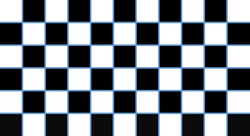

11 * 6 * 5

Number of black squares = 31

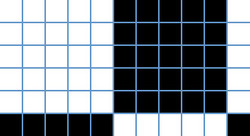

In [ ]:
import numpy as np

def count_checkerboard(h,w,r):

    return ((h//r)//2)*r*w+ r*(h%r)*((w//r)//2)+ (h%r)*(w%r) * ((w//r)%2) if (h//r)%2==0 else ((h//r)//2)*r*w + r*r*((w//r)//2) + (h%r)*((w//r)//2+(w//r)%2)*r + r*(w%r)*((w//r)%2)+(h%r)*(w%r)*((w//r+1)%2)

# More exhaustive version 
def count_checkerboard(h,w,r):
    x=0 
    if (h//r)%2==1  and (w//r)%2==1 :
        x=((h//r)//2)*r*w + r*r*((w//r)//2)+ r*(w%r) +(h%r)*((w//r)//2 + 1)*r 
    if (h//r)%2==1  and (w//r)%2==0 :
        x=((h//r)//2)*r*w + r*r*((w//r)//2) + (h%r)*((w//r)//2)*r + (h%r)*(w%r) 

    if (h//r)%2==0  and (w//r)%2==1 :
        x=((h//r)//2)*r*w+ r*(h%r)*((w//r)//2)+ (h%r)*(w%r)
    if (h//r)%2==0  and (w//r)%2==0 :
        x=((h//r)//2)*r*w+ r*(h%r)*((w//r)//2)
    return x

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }

def tests():
    @test.it("Small examples")
    def small_ex():
        # From the description
        test.assert_equals(count_checkerboard(11, 6, 1), 33)
        test.assert_equals(count_checkerboard(11, 6, 2), 32)
        test.assert_equals(count_checkerboard(11, 6, 5), 31)
        
        # More basic examples
        test.assert_equals(count_checkerboard(9, 5, 2), 22)
        test.assert_equals(count_checkerboard(9, 5, 4), 21)
        test.assert_equals(count_checkerboard(9, 5, 8), 5)
        
    @test.it("Larger examples")
    def larger_ex():
        test.assert_equals(count_checkerboard(123456, 7654321, 333), 472485924597)
        test.assert_equals(count_checkerboard(10**10, 10, 20), 5*10**10)
        test.assert_equals(count_checkerboard(10**10, 11, 21), 54999999978)
        test.assert_equals(count_checkerboard(8**5, 7**9, 124), 661153496464)

    @test.it("Some edge cases?")
    def edge_cases():
        test.assert_equals(count_checkerboard(0, 123, 1), 0)
        test.assert_equals(count_checkerboard(445, 998, 101010), 0)
        test.assert_equals(count_checkerboard(0, 0, 1), 0)
tests()